In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
%matplotlib inline

# load the spectral data

In [2]:
# loading the spectral data of 1mm particles
data1mm= pd.read_csv("spec1mm.csv", index_col=0)
data1mm.head()

,plastics,condition,973.61,979.202,984.794,990.386,995.978,1001.57,1007.162,1012.754,...,2528.186,2533.778,2539.37,2544.962,2550.554,2556.146,2561.738,2567.33,2572.922,2578.514
ABS_1mm_dry_00,ABS,dry,1.155382,1.136041,1.129438,1.124556,1.123223,1.125186,1.122072,1.113012,...,0.453559,0.530882,0.587800,0.632353,0.714286,0.664756,0.745981,0.863971,0.953917,0.983240
ABS_1mm_dry_01,ABS,dry,1.049130,1.032949,1.029821,1.011280,1.016308,1.015942,1.017733,1.012910,...,0.399766,0.488636,0.521968,0.565126,0.626263,0.755224,0.876923,0.848148,1.014085,1.109756
ABS_1mm_dry_02,ABS,dry,0.918367,0.916796,0.896104,0.896865,0.893836,0.889013,0.883447,0.883568,...,0.405034,0.418011,0.478873,0.491632,0.651629,0.681682,0.723127,0.861423,0.760000,0.988166
ABS_1mm_dry_03,ABS,dry,1.097260,1.086831,1.089341,1.093131,1.085229,1.087673,1.086925,1.085108,...,0.456821,0.482659,0.540146,0.617021,0.712676,0.832215,0.813433,0.889868,0.880383,1.219355
ABS_1mm_dry_04,ABS,dry,0.845129,0.845066,0.828183,0.824364,0.815437,0.816612,0.815087,0.817415,...,0.416667,0.492877,0.492119,0.600840,0.680203,0.709677,0.774809,0.962963,0.912371,1.108974


In [3]:
# # loading the spectral data of 100–500 µm particles
data100um= pd.read_csv("spec100-500um.csv", index_col=0)
data100um.head()

,plastics,condition,973.61,979.202,984.794,990.386,995.978,1001.57,1007.162,1012.754,...,2528.186,2533.778,2539.37,2544.962,2550.554,2556.146,2561.738,2567.33,2572.922,2578.514
ABS_100-500um_dry_00,ABS,dry,0.834411,0.844746,0.849438,0.831774,0.821521,0.826918,0.827839,0.821403,...,0.513711,0.530398,0.521851,0.579968,0.631579,0.686420,0.817365,0.779221,0.873563,0.958333
ABS_100-500-500um_dry_01,ABS,dry,0.838213,0.812593,0.825424,0.809780,0.815808,0.808909,0.805974,0.806425,...,0.521495,0.562217,0.593074,0.643234,0.650602,0.688488,0.733681,0.709199,0.781609,0.919431
ABS_100-500um_dry_02,ABS,dry,0.845028,0.819678,0.820913,0.821151,0.823078,0.810144,0.811676,0.805917,...,0.605145,0.605528,0.676590,0.668254,0.707031,0.747396,0.913907,0.802632,0.726190,0.889423
ABS_100-500um_dry_03,ABS,dry,0.851053,0.841087,0.835973,0.838987,0.829411,0.829954,0.829444,0.827497,...,0.609183,0.627141,0.590343,0.589928,0.744856,0.725301,0.816199,0.710145,0.875000,0.971591
ABS_100-500um_dry_04,ABS,dry,0.838462,0.838428,0.820112,0.820285,0.816577,0.809338,0.805186,0.807531,...,0.592412,0.592269,0.621993,0.689300,0.714286,0.867403,0.768977,0.893939,0.837438,1.066225


## Separate the spectral data into the ranges of 1000–1700 nm wavelength and 1000–2500 nm wavelength

In [4]:
# 1000-1700 nm range 1mm particles
ref1mm17= data1mm.iloc[:, 7:132]
ref1mm17.head()

,1001.57,1007.162,1012.754,1018.346,1023.938,1029.53,1035.122,1040.714,1046.306,1051.898,...,1644.65,1650.242,1655.834,1661.426,1667.018,1672.61,1678.202,1683.794,1689.386,1694.978
ABS_1mm_dry_00,1.125186,1.122072,1.113012,1.118719,1.115354,1.120581,1.114577,1.107909,1.107720,1.106882,...,0.837488,0.805043,0.732430,0.648171,0.580103,0.544621,0.542845,0.552557,0.564989,0.584790
ABS_1mm_dry_01,1.015942,1.017733,1.012910,1.009965,1.008172,1.009517,1.011451,1.009427,1.010878,1.007947,...,0.774285,0.742097,0.669081,0.587325,0.522997,0.489377,0.485426,0.494464,0.508752,0.525234
ABS_1mm_dry_02,0.889013,0.883447,0.883568,0.883803,0.885465,0.884179,0.880669,0.886333,0.885214,0.884793,...,0.698865,0.654880,0.562352,0.459075,0.376013,0.334076,0.330531,0.342636,0.360780,0.388628
ABS_1mm_dry_03,1.087673,1.086925,1.085108,1.082752,1.082070,1.080591,1.078400,1.077801,1.080997,1.077754,...,0.810096,0.770265,0.680894,0.582087,0.501142,0.459669,0.457839,0.467842,0.486388,0.506475
ABS_1mm_dry_04,0.816612,0.815087,0.817415,0.813197,0.811659,0.818224,0.813253,0.817280,0.818463,0.819139,...,0.743833,0.713196,0.631023,0.547014,0.471205,0.431197,0.430934,0.440496,0.461221,0.482574


In [5]:
# 1000-2500 nm range 1mm particles
ref1mm25= data1mm.iloc[:, 7:275]
ref1mm25.head()

,1001.57,1007.162,1012.754,1018.346,1023.938,1029.53,1035.122,1040.714,1046.306,1051.898,...,2444.306,2449.898,2455.49,2461.082,2466.674,2472.266,2477.858,2483.45,2489.042,2494.634
ABS_1mm_dry_00,1.125186,1.122072,1.113012,1.118719,1.115354,1.120581,1.114577,1.107909,1.107720,1.106882,...,0.269618,0.265423,0.262056,0.245066,0.244088,0.245291,0.273927,0.296112,0.320173,0.362757
ABS_1mm_dry_01,1.015942,1.017733,1.012910,1.009965,1.008172,1.009517,1.011451,1.009427,1.010878,1.007947,...,0.226494,0.199580,0.198476,0.193421,0.202079,0.194517,0.208583,0.244422,0.300418,0.321023
ABS_1mm_dry_02,0.889013,0.883447,0.883568,0.883803,0.885465,0.884179,0.880669,0.886333,0.885214,0.884793,...,0.153180,0.146230,0.125480,0.141252,0.130849,0.145879,0.151046,0.181553,0.194180,0.229462
ABS_1mm_dry_03,1.087673,1.086925,1.085108,1.082752,1.082070,1.080591,1.078400,1.077801,1.080997,1.077754,...,0.253169,0.233168,0.225303,0.224610,0.233363,0.233212,0.247186,0.286911,0.304441,0.337470
ABS_1mm_dry_04,0.816612,0.815087,0.817415,0.813197,0.811659,0.818224,0.813253,0.817280,0.818463,0.819139,...,0.214884,0.204680,0.185736,0.171213,0.184417,0.186047,0.231818,0.244119,0.284594,0.329363


In [6]:
# 1000-1700 range 100–500 µm particles
ref100um17= data100um.iloc[:, 7:132]
ref100um17.head()

,1001.57,1007.162,1012.754,1018.346,1023.938,1029.53,1035.122,1040.714,1046.306,1051.898,...,1644.65,1650.242,1655.834,1661.426,1667.018,1672.61,1678.202,1683.794,1689.386,1694.978
ABS_100-500um_dry_00,0.826918,0.827839,0.821403,0.822371,0.823746,0.817181,0.814964,0.815495,0.819129,0.815453,...,0.722046,0.706594,0.666633,0.613602,0.566888,0.538378,0.537210,0.544373,0.555099,0.572420
ABS_100-500-500um_dry_01,0.808909,0.805974,0.806425,0.804354,0.803514,0.807015,0.808044,0.806663,0.804254,0.805924,...,0.736316,0.722786,0.689700,0.651457,0.612344,0.591117,0.588828,0.591613,0.604593,0.616108
ABS_100-500um_dry_02,0.810144,0.811676,0.805917,0.803568,0.805267,0.806524,0.802869,0.804290,0.805372,0.803206,...,0.756971,0.744783,0.716123,0.675884,0.636836,0.617844,0.614126,0.618054,0.629634,0.642709
ABS_100-500um_dry_03,0.829954,0.829444,0.827497,0.826705,0.818466,0.821181,0.822768,0.825170,0.823593,0.820006,...,0.761755,0.748729,0.716517,0.673519,0.631645,0.607567,0.608823,0.614655,0.625309,0.639277
ABS_100-500um_dry_04,0.809338,0.805186,0.807531,0.801205,0.804809,0.806958,0.799441,0.803469,0.806662,0.802894,...,0.748385,0.740654,0.712619,0.674803,0.631053,0.613408,0.612034,0.616872,0.625870,0.638825


In [7]:
# 1000-2500 range 100–500 µm particles
ref100um25= data100um.iloc[:, 7:275]
ref100um25.head()

,1001.57,1007.162,1012.754,1018.346,1023.938,1029.53,1035.122,1040.714,1046.306,1051.898,...,2444.306,2449.898,2455.49,2461.082,2466.674,2472.266,2477.858,2483.45,2489.042,2494.634
ABS_100-500um_dry_00,0.826918,0.827839,0.821403,0.822371,0.823746,0.817181,0.814964,0.815495,0.819129,0.815453,...,0.338877,0.306608,0.258427,0.264576,0.248387,0.292151,0.299315,0.358035,0.399057,0.401348
ABS_100-500-500um_dry_01,0.808909,0.805974,0.806425,0.804354,0.803514,0.807015,0.808044,0.806663,0.804254,0.805924,...,0.400828,0.365441,0.338157,0.322097,0.319016,0.342242,0.370170,0.404733,0.431620,0.455224
ABS_100-500um_dry_02,0.810144,0.811676,0.805917,0.803568,0.805267,0.806524,0.802869,0.804290,0.805372,0.803206,...,0.425101,0.392471,0.371923,0.349374,0.356525,0.361390,0.411788,0.457781,0.492721,0.510837
ABS_100-500um_dry_03,0.829954,0.829444,0.827497,0.826705,0.818466,0.821181,0.822768,0.825170,0.823593,0.820006,...,0.402818,0.362568,0.335888,0.325268,0.312725,0.327462,0.362603,0.418696,0.471304,0.479459
ABS_100-500um_dry_04,0.809338,0.805186,0.807531,0.801205,0.804809,0.806958,0.799441,0.803469,0.806662,0.802894,...,0.408455,0.384170,0.343461,0.347543,0.346491,0.346242,0.383650,0.437203,0.471495,0.489933


In [8]:
# extract infomation data
info1mm= data1mm.iloc[:, 0:2]
info100um= data100um.iloc[:, 0:2]

**Divide the data into Datasets L-D, L-S, S-D, and S-W**

- Dataset L-D: 1mm (large) particle on a dry filter
- Dataset L-W: 1mm (large) particle on a wet filter
- Dataset S-D: 100–500 µm (small) particle on a dry filter
- Dataset S-W: 100–500 µm (small) particle on a wet filter

In [9]:
# data of 1000-1700 nm
LD17= ref1mm17[info1mm['condition'].isin(['dry'])] # Dataset L-D in the range of 1000-1700 nm wavelength
LW17= ref1mm17[info1mm['condition'].isin(['wet'])] # Dataset L-W in the range of 1000-1700 nm wavelength
SD17= ref100um17[info100um['condition'].isin(['dry'])] # Dataset S-D in the range of 1000-1700 nm wavelength
SW17= ref100um17[info100um['condition'].isin(['wet'])] # Dataset S-W in the range of 1000-1700 nm wavelength

# data of 1000-2500 nm
LD25= ref1mm25[info1mm['condition'].isin(['dry'])] # Dataset L-D in the range of 1000-2500 nm wavelength
LW25= ref1mm25[info1mm['condition'].isin(['wet'])] # Dataset L-W in the range of 1000-2500 nm wavelength
SD25= ref100um25[info100um['condition'].isin(['dry'])] # Dataset S-D in the range of 1000-2500 nm wavelength
SW25= ref100um25[info100um['condition'].isin(['wet'])] # Dataset S-W in the range of 1000-2500 nm wavelength

# info data
info_LD= info1mm[info1mm['condition'].isin(['dry'])] #1mm particles on the dry filter
info_LW= info1mm[info1mm['condition'].isin(['wet'])] #1mm particles on the wet filter
info_SD= info100um[info100um['condition'].isin(['dry'])] #100–500 µm particles on the dry filter
info_SW= info100um[info100um['condition'].isin(['wet'])] #100–500 µm particles on the wet filter

## Preprocess

In [10]:
# Convert pandas dataframes into a NumPy arrays
LD17_Np= LD17.values
LW17_Np= LW17.values
SD17_Np= SD17.values
SW17_Np= SW17.values

LD25_Np= LD25.values
LW25_Np= LW25.values
SD25_Np= SD25.values
SW25_Np= SW25.values

In [11]:
# standard normal variate (SNV)
snv_LD17 = np.zeros_like(LD17_Np)
for i in range(snv_LD17.shape[0]):
    snv_LD17[i] = (LD17_Np[i,:] - np.mean(LD17_Np[i,:])) / np.std(LD17_Np[i,:])

snv_LW17 = np.zeros_like(LW17_Np)
for i in range(snv_LW17.shape[0]):
    snv_LW17[i] = (LW17_Np[i,:] - np.mean(LW17_Np[i,:])) / np.std(LW17_Np[i,:])

snv_SD17 = np.zeros_like(SD17_Np)
for i in range(snv_SD17.shape[0]):
    snv_SD17[i] = (SD17_Np[i,:] - np.mean(SD17_Np[i,:])) / np.std(SD17_Np[i,:])

snv_SW17 = np.zeros_like(SW17_Np)
for i in range(snv_SW17.shape[0]):
    snv_SW17[i] = (SW17_Np[i,:] - np.mean(SW17_Np[i,:])) / np.std(SW17_Np[i,:])


snv_LD25 = np.zeros_like(LD25_Np)
for i in range(snv_LD25.shape[0]):
    snv_LD25[i] = (LD25_Np[i,:] - np.mean(LD25_Np[i,:])) / np.std(LD25_Np[i,:])

snv_LW25 = np.zeros_like(LW25_Np)
for i in range(snv_LW25.shape[0]):
    snv_LW25[i] = (LW25_Np[i,:] - np.mean(LW25_Np[i,:])) / np.std(LW25_Np[i,:])

snv_SD25 = np.zeros_like(SD25_Np)
for i in range(snv_SD25.shape[0]):
    snv_SD25[i] = (SD25_Np[i,:] - np.mean(SD25_Np[i,:])) / np.std(SD25_Np[i,:])
    
snv_SW25 = np.zeros_like(SW25_Np)
for i in range(snv_SW25.shape[0]):
    snv_SW25[i] = (SW25_Np[i,:] - np.mean(SW25_Np[i,:])) / np.std(SW25_Np[i,:])

In [12]:
# Savitzky-Golay filter
sg_LD17= np.zeros_like(snv_LD17)
for i in range(sg_LD17.shape[0]):
    sg_LD17[i]= signal.savgol_filter(snv_LD17[i], 11, 4, deriv=2, mode="mirror")
    
sg_LW17= np.zeros_like(snv_LW17)
for i in range(sg_LW17.shape[0]):
    sg_LW17[i]= signal.savgol_filter(snv_LW17[i], 11, 4, deriv=2, mode="mirror")
    
sg_SD17= np.zeros_like(snv_SD17)
for i in range(sg_SD17.shape[0]):
    sg_SD17[i]= signal.savgol_filter(snv_SD17[i], 11, 4, deriv=2, mode="mirror")
    
sg_SW17= np.zeros_like(snv_SW17)
for i in range(sg_SW17.shape[0]):
    sg_SW17[i]= signal.savgol_filter(snv_SW17[i], 11, 4, deriv=2, mode="mirror")
    

sg_LD25= np.zeros_like(snv_LD25)
for i in range(sg_LD25.shape[0]):
    sg_LD25[i]= signal.savgol_filter(snv_LD25[i], 11, 4, deriv=2, mode="mirror")
    
sg_LW25= np.zeros_like(snv_LW25)
for i in range(sg_LW25.shape[0]):
    sg_LW25[i]= signal.savgol_filter(snv_LW25[i], 11, 4, deriv=2, mode="mirror")
    
sg_SD25= np.zeros_like(snv_SD25)
for i in range(sg_SD25.shape[0]):
    sg_SD25[i]= signal.savgol_filter(snv_SD25[i], 11, 4, deriv=2, mode="mirror")
    
sg_SW25= np.zeros_like(snv_SW25)
for i in range(sg_SW25.shape[0]):
    sg_SW25[i]= signal.savgol_filter(snv_SW25[i], 11, 4, deriv=2, mode="mirror")

In [13]:
# extract wavelength data
wl25= ref1mm25.columns
wl17= ref1mm17.columns

## Illustrate the spetral data (Figure 1)

In [14]:
# average the spectral data for each polymer type

LD25_ABS = LD25_Np[0:100]
LD25_Nylon = LD25_Np[100:200]
LD25_PC = LD25_Np[200:300]
LD25_PE = LD25_Np[300:400]
LD25_PET = LD25_Np[400:500]
LD25_POM = LD25_Np[500:600]
LD25_PP = LD25_Np[600:700]
LD25_PS = LD25_Np[700:800]
LD25_PVC = LD25_Np[800:900]

LW25_ABS = LW25_Np[0:100]
LW25_Nylon = LW25_Np[100:200]
LW25_PC = LW25_Np[200:300]
LW25_PE = LW25_Np[300:400]
LW25_PET = LW25_Np[400:500]
LW25_POM = LW25_Np[500:600]
LW25_PP = LW25_Np[600:700]
LW25_PS = LW25_Np[700:800]
LW25_PVC = LW25_Np[800:900]


SD25_ABS = SD25_Np[0:100]
SD25_Nylon = SD25_Np[100:200]
SD25_PC = SD25_Np[200:300]
SD25_PE = SD25_Np[300:400]
SD25_PET = SD25_Np[400:500]
SD25_POM = SD25_Np[500:600]
SD25_PP = SD25_Np[600:700]
SD25_PS = SD25_Np[700:800]
SD25_PVC = SD25_Np[800:900]


SW25_ABS = SW25_Np[0:100]
SW25_Nylon = SW25_Np[100:200]
SW25_PC = SW25_Np[200:300]
SW25_PE = SW25_Np[300:400]
SW25_PET = SW25_Np[400:500]
SW25_POM = SW25_Np[500:600]
SW25_PP = SW25_Np[600:700]
SW25_PS = SW25_Np[700:800]
SW25_PVC = SW25_Np[800:900]

In [15]:
# average the spectral data for each polymer type

LD17_ABS = LD17_Np[0:100]
LD17_Nylon = LD17_Np[100:200]
LD17_PC = LD17_Np[200:300]
LD17_PE = LD17_Np[300:400]
LD17_PET = LD17_Np[400:500]
LD17_POM = LD17_Np[500:600]
LD17_PP = LD17_Np[600:700]
LD17_PS = LD17_Np[700:800]
LD17_PVC = LD17_Np[800:900]

LW17_ABS = LW17_Np[0:100]
LW17_Nylon = LW17_Np[100:200]
LW17_PC = LW17_Np[200:300]
LW17_PE = LW17_Np[300:400]
LW17_PET = LW17_Np[400:500]
LW17_POM = LW17_Np[500:600]
LW17_PP = LW17_Np[600:700]
LW17_PS = LW17_Np[700:800]
LW17_PVC = LW17_Np[800:900]


SD17_ABS = SD17_Np[0:100]
SD17_Nylon = SD17_Np[100:200]
SD17_PC = SD17_Np[200:300]
SD17_PE = SD17_Np[300:400]
SD17_PET = SD17_Np[400:500]
SD17_POM = SD17_Np[500:600]
SD17_PP = SD17_Np[600:700]
SD17_PS = SD17_Np[700:800]
SD17_PVC = SD17_Np[800:900]


SW17_ABS = SW17_Np[0:100]
SW17_Nylon = SW17_Np[100:200]
SW17_PC = SW17_Np[200:300]
SW17_PE = SW17_Np[300:400]
SW17_PET = SW17_Np[400:500]
SW17_POM = SW17_Np[500:600]
SW17_PP = SW17_Np[600:700]
SW17_PS = SW17_Np[700:800]
SW17_PVC = SW17_Np[800:900]

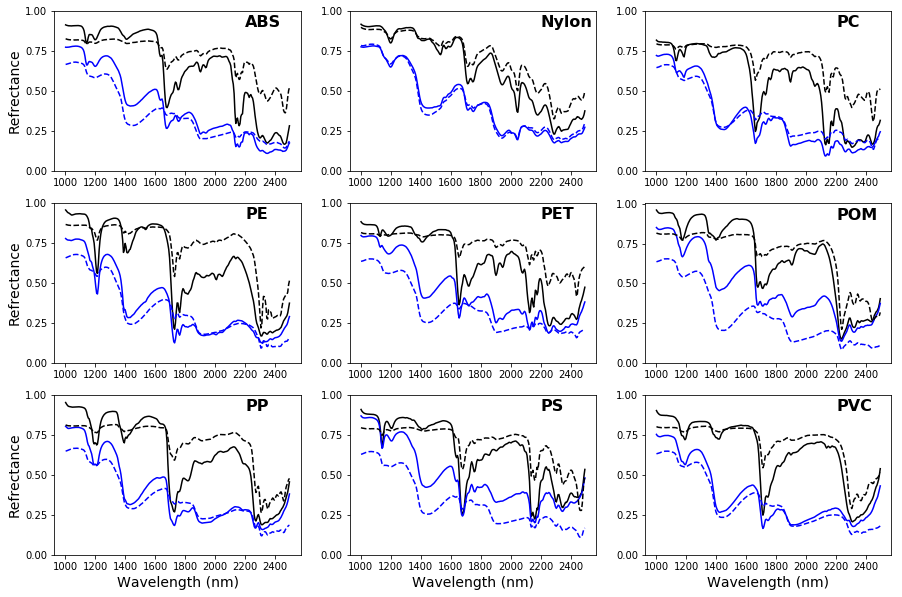

In [16]:
plt.figure(figsize=(15, 10))

plt.subplot(3,3,1)
plt.plot(wl25.astype(np.float32), np.average(LD25_ABS, axis=0), color='black', label='ABS')
plt.plot(wl25.astype(np.float32), np.average(LW25_ABS, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(SD25_ABS, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(SW25_ABS, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.yticks([0, 0.25, 0.50, 0.75, 1.00])
plt.text(2200, 0.9, 'ABS', fontsize=16, fontweight='bold')
plt.ylabel('Refrectance', fontsize=14)

plt.subplot(3,3,2)
plt.plot(wl25.astype(np.float32), np.average(LD25_Nylon, axis=0), color='black', label='Nylon')
plt.plot(wl25.astype(np.float32), np.average(LW25_Nylon, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(SD25_Nylon, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(SW25_Nylon, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.yticks([0, 0.25, 0.50, 0.75, 1.00])
plt.text(2200, 0.9, 'Nylon', fontsize=16, fontweight='bold')

plt.subplot(3,3,3)
plt.plot(wl25.astype(np.float32), np.average(LD25_PC, axis=0), color='black', label='PC')
plt.plot(wl25.astype(np.float32), np.average(LW25_PC, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(SD25_PC, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(SW25_PC, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.yticks([0, 0.25, 0.50, 0.75, 1.00])
plt.text(2200, 0.9, 'PC', fontsize=16, fontweight='bold')

plt.subplot(3,3,4)
plt.plot(wl25.astype(np.float32), np.average(LD25_PE, axis=0), color='black', label='PE')
plt.plot(wl25.astype(np.float32), np.average(LW25_PE, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(SD25_PE, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(SW25_PE, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.yticks([0, 0.25, 0.50, 0.75, 1.00])
plt.text(2200, 0.9, 'PE', fontsize=16, fontweight='bold')
plt.ylabel('Refrectance', fontsize=14)

plt.subplot(3,3,5)
plt.plot(wl25.astype(np.float32), np.average(LD25_PET, axis=0), color='black', label='PET')
plt.plot(wl25.astype(np.float32), np.average(LW25_PET, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(SD25_PET, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(SW25_PET, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.yticks([0, 0.25, 0.50, 0.75, 1.00])
plt.text(2200, 0.9, 'PET', fontsize=16, fontweight='bold')

plt.subplot(3,3,6)
plt.plot(wl25.astype(np.float32), np.average(LD25_POM, axis=0), color='black', label='POM')
plt.plot(wl25.astype(np.float32), np.average(LW25_POM, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(SD25_POM, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(SW25_POM, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.yticks([0, 0.25, 0.50, 0.75, 1.00])
plt.text(2200, 0.9, 'POM', fontsize=16, fontweight='bold')

plt.subplot(3,3,7)
plt.plot(wl25.astype(np.float32), np.average(LD25_PP, axis=0), color='black', label='PP')
plt.plot(wl25.astype(np.float32), np.average(LW25_PP, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(SD25_PP, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(SW25_PP, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.yticks([0, 0.25, 0.50, 0.75, 1.00])
plt.text(2200, 0.9, 'PP', fontsize=16, fontweight='bold')
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('Refrectance', fontsize=14)

plt.subplot(3,3,8)
plt.plot(wl25.astype(np.float32), np.average(LD25_PS, axis=0), color='black', label='PS')
plt.plot(wl25.astype(np.float32), np.average(LW25_PS, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(SD25_PS, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(SW25_PS, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.yticks([0, 0.25, 0.50, 0.75, 1.00])
plt.text(2200, 0.9, 'PS', fontsize=16, fontweight='bold')
plt.xlabel('Wavelength (nm)', fontsize=14)

plt.subplot(3,3,9)
plt.plot(wl25.astype(np.float32), np.average(LD25_PVC, axis=0), color='black', label='PVC')
plt.plot(wl25.astype(np.float32), np.average(LW25_PVC, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(SD25_PVC, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(SW25_PVC, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.yticks([0, 0.25, 0.50, 0.75, 1.00])
plt.text(2200, 0.9, 'PVC', fontsize=16, fontweight='bold')
plt.xlabel('Wavelength (nm)', fontsize=14)

plt.subplots_adjust(hspace=0.2)

## Illustrate the SNV data

In [17]:
# average the snv data for each polymer type

snv_LD25_ABS = snv_LD25[0:100]
snv_LD25_Nylon = snv_LD25[100:200]
snv_LD25_PC = snv_LD25[200:300]
snv_LD25_PE = snv_LD25[300:400]
snv_LD25_PET = snv_LD25[400:500]
snv_LD25_POM = snv_LD25[500:600]
snv_LD25_PP = snv_LD25[600:700]
snv_LD25_PS = snv_LD25[700:800]
snv_LD25_PVC = snv_LD25[800:900]

snv_LW25_ABS = snv_LW25[0:100]
snv_LW25_Nylon = snv_LW25[100:200]
snv_LW25_PC = snv_LW25[200:300]
snv_LW25_PE = snv_LW25[300:400]
snv_LW25_PET = snv_LW25[400:500]
snv_LW25_POM = snv_LW25[500:600]
snv_LW25_PP = snv_LW25[600:700]
snv_LW25_PS = snv_LW25[700:800]
snv_LW25_PVC = snv_LW25[800:900]

snv_SD25_ABS = snv_SD25[0:100]
snv_SD25_Nylon = snv_SD25[100:200]
snv_SD25_PC = snv_SD25[200:300]
snv_SD25_PE = snv_SD25[300:400]
snv_SD25_PET = snv_SD25[400:500]
snv_SD25_POM = snv_SD25[500:600]
snv_SD25_PP = snv_SD25[600:700]
snv_SD25_PS = snv_SD25[700:800]
snv_SD25_PVC = snv_SD25[800:900]

snv_SW25_ABS = snv_SW25[0:100]
snv_SW25_Nylon = snv_SW25[100:200]
snv_SW25_PC = snv_SW25[200:300]
snv_SW25_PE = snv_SW25[300:400]
snv_SW25_PET = snv_SW25[400:500]
snv_SW25_POM = snv_SW25[500:600]
snv_SW25_PP = snv_SW25[600:700]
snv_SW25_PS = snv_SW25[700:800]
snv_SW25_PVC = snv_SW25[800:900]

In [18]:
# average the snv data for each polymer type

snv_LD17_ABS = snv_LD17[0:100]
snv_LD17_Nylon = snv_LD17[100:200]
snv_LD17_PC = snv_LD17[200:300]
snv_LD17_PE = snv_LD17[300:400]
snv_LD17_PET = snv_LD17[400:500]
snv_LD17_POM = snv_LD17[500:600]
snv_LD17_PP = snv_LD17[600:700]
snv_LD17_PS = snv_LD17[700:800]
snv_LD17_PVC = snv_LD17[800:900]

snv_LW17_ABS = snv_LW17[0:100]
snv_LW17_Nylon = snv_LW17[100:200]
snv_LW17_PC = snv_LW17[200:300]
snv_LW17_PE = snv_LW17[300:400]
snv_LW17_PET = snv_LW17[400:500]
snv_LW17_POM = snv_LW17[500:600]
snv_LW17_PP = snv_LW17[600:700]
snv_LW17_PS = snv_LW17[700:800]
snv_LW17_PVC = snv_LW17[800:900]

snv_SD17_ABS = snv_SD17[0:100]
snv_SD17_Nylon = snv_SD17[100:200]
snv_SD17_PC = snv_SD17[200:300]
snv_SD17_PE = snv_SD17[300:400]
snv_SD17_PET = snv_SD17[400:500]
snv_SD17_POM = snv_SD17[500:600]
snv_SD17_PP = snv_SD17[600:700]
snv_SD17_PS = snv_SD17[700:800]
snv_SD17_PVC = snv_SD17[800:900]

snv_SW17_ABS = snv_SW17[0:100]
snv_SW17_Nylon = snv_SW17[100:200]
snv_SW17_PC = snv_SW17[200:300]
snv_SW17_PE = snv_SW17[300:400]
snv_SW17_PET = snv_SW17[400:500]
snv_SW17_POM = snv_SW17[500:600]
snv_SW17_PP = snv_SW17[600:700]
snv_SW17_PS = snv_SW17[700:800]
snv_SW17_PVC = snv_SW17[800:900]

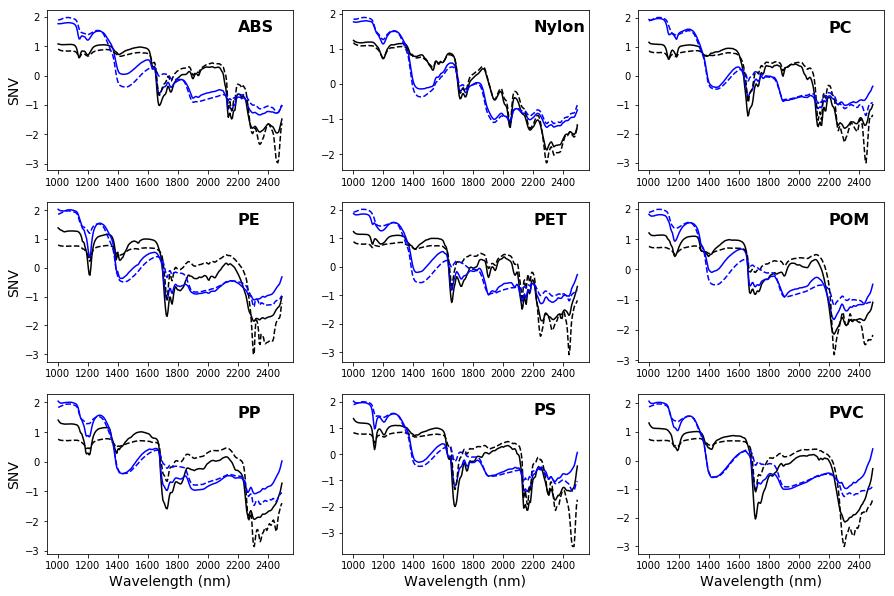

In [19]:
plt.figure(figsize=(15, 10))

plt.subplot(3,3,1)
plt.plot(wl25.astype(np.float32), np.average(snv_LD25_ABS, axis=0), color='black', label='ABS')
plt.plot(wl25.astype(np.float32), np.average(snv_LW25_ABS, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(snv_SD25_ABS, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(snv_SW25_ABS, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.text(2200, 1.5, 'ABS', fontsize=16, fontweight='bold')
plt.ylabel('SNV', fontsize=14)

plt.subplot(3,3,2)
plt.plot(wl25.astype(np.float32), np.average(snv_LD25_Nylon, axis=0), color='black', label='Nylon')
plt.plot(wl25.astype(np.float32), np.average(snv_LW25_Nylon, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(snv_SD25_Nylon, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(snv_SW25_Nylon, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.text(2200, 1.5, 'Nylon', fontsize=16, fontweight='bold')

plt.subplot(3,3,3)
plt.plot(wl25.astype(np.float32), np.average(snv_LD25_PC, axis=0), color='black', label='PC')
plt.plot(wl25.astype(np.float32), np.average(snv_LW25_PC, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(snv_SD25_PC, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(snv_SW25_PC, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.text(2200, 1.5, 'PC', fontsize=16, fontweight='bold')

plt.subplot(3,3,4)
plt.plot(wl25.astype(np.float32), np.average(snv_LD25_PE, axis=0), color='black', label='PE')
plt.plot(wl25.astype(np.float32), np.average(snv_LW25_PE, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(snv_SD25_PE, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(snv_SW25_PE, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.text(2200, 1.5, 'PE', fontsize=16, fontweight='bold')
plt.ylabel('SNV', fontsize=14)

plt.subplot(3,3,5)
plt.plot(wl25.astype(np.float32), np.average(snv_LD25_PET, axis=0), color='black', label='PET')
plt.plot(wl25.astype(np.float32), np.average(snv_LW25_PET, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(snv_SD25_PET, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(snv_SW25_PET, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.text(2200, 1.5, 'PET', fontsize=16, fontweight='bold')

plt.subplot(3,3,6)
plt.plot(wl25.astype(np.float32), np.average(snv_LD25_POM, axis=0), color='black', label='POM')
plt.plot(wl25.astype(np.float32), np.average(snv_LW25_POM, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(snv_SD25_POM, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(snv_SW25_POM, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.text(2200, 1.5, 'POM', fontsize=16, fontweight='bold')

plt.subplot(3,3,7)
plt.plot(wl25.astype(np.float32), np.average(snv_LD25_PP, axis=0), color='black', label='PP')
plt.plot(wl25.astype(np.float32), np.average(snv_LW25_PP, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(snv_SD25_PP, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(snv_SW25_PP, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.text(2200, 1.5, 'PP', fontsize=16, fontweight='bold')
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('SNV', fontsize=14)

plt.subplot(3,3,8)
plt.plot(wl25.astype(np.float32), np.average(snv_LD25_PS, axis=0), color='black', label='PS')
plt.plot(wl25.astype(np.float32), np.average(snv_LW25_PS, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(snv_SD25_PS, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(snv_SW25_PS, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.text(2200, 1.5, 'PS', fontsize=16, fontweight='bold')
plt.xlabel('Wavelength (nm)', fontsize=14)

plt.subplot(3,3,9)
plt.plot(wl25.astype(np.float32), np.average(snv_LD25_PVC, axis=0), color='black', label='PVC')
plt.plot(wl25.astype(np.float32), np.average(snv_LW25_PVC, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(snv_SD25_PVC, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(snv_SW25_PVC, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.text(2200, 1.5, 'PVC', fontsize=16, fontweight='bold')
plt.xlabel('Wavelength (nm)', fontsize=14)

plt.subplots_adjust(hspace=0.2)

## Illustrate the Savitzky-Golay processed (preprocessed) data (Figure 2)

In [20]:
# average the Savitzky-Golay processed data for each polymer type

sg_LD25_ABS = sg_LD25[0:100]
sg_LD25_Nylon = sg_LD25[100:200]
sg_LD25_PC = sg_LD25[200:300]
sg_LD25_PE = sg_LD25[300:400]
sg_LD25_PET = sg_LD25[400:500]
sg_LD25_POM = sg_LD25[500:600]
sg_LD25_PP = sg_LD25[600:700]
sg_LD25_PS = sg_LD25[700:800]
sg_LD25_PVC = sg_LD25[800:900]

sg_LW25_ABS = sg_LW25[0:100]
sg_LW25_Nylon = sg_LW25[100:200]
sg_LW25_PC = sg_LW25[200:300]
sg_LW25_PE = sg_LW25[300:400]
sg_LW25_PET = sg_LW25[400:500]
sg_LW25_POM = sg_LW25[500:600]
sg_LW25_PP = sg_LW25[600:700]
sg_LW25_PS = sg_LW25[700:800]
sg_LW25_PVC = sg_LW25[800:900]

sg_SD25_ABS = sg_SD25[0:100]
sg_SD25_Nylon = sg_SD25[100:200]
sg_SD25_PC = sg_SD25[200:300]
sg_SD25_PE = sg_SD25[300:400]
sg_SD25_PET = sg_SD25[400:500]
sg_SD25_POM = sg_SD25[500:600]
sg_SD25_PP = sg_SD25[600:700]
sg_SD25_PS = sg_SD25[700:800]
sg_SD25_PVC = sg_SD25[800:900]

sg_SW25_ABS = sg_SW25[0:100]
sg_SW25_Nylon = sg_SW25[100:200]
sg_SW25_PC = sg_SW25[200:300]
sg_SW25_PE = sg_SW25[300:400]
sg_SW25_PET = sg_SW25[400:500]
sg_SW25_POM = sg_SW25[500:600]
sg_SW25_PP = sg_SW25[600:700]
sg_SW25_PS = sg_SW25[700:800]
sg_SW25_PVC = sg_SW25[800:900]

In [21]:
# average the Savitzky-Golay processed data for each polymer type

sg_LD17_ABS = sg_LD17[0:100]
sg_LD17_Nylon = sg_LD17[100:200]
sg_LD17_PC = sg_LD17[200:300]
sg_LD17_PE = sg_LD17[300:400]
sg_LD17_PET = sg_LD17[400:500]
sg_LD17_POM = sg_LD17[500:600]
sg_LD17_PP = sg_LD17[600:700]
sg_LD17_PS = sg_LD17[700:800]
sg_LD17_PVC = sg_LD17[800:900]

sg_LW17_ABS = sg_LW17[0:100]
sg_LW17_Nylon = sg_LW17[100:200]
sg_LW17_PC = sg_LW17[200:300]
sg_LW17_PE = sg_LW17[300:400]
sg_LW17_PET = sg_LW17[400:500]
sg_LW17_POM = sg_LW17[500:600]
sg_LW17_PP = sg_LW17[600:700]
sg_LW17_PS = sg_LW17[700:800]
sg_LW17_PVC = sg_LW17[800:900]

sg_SD17_ABS = sg_SD17[0:100]
sg_SD17_Nylon = sg_SD17[100:200]
sg_SD17_PC = sg_SD17[200:300]
sg_SD17_PE = sg_SD17[300:400]
sg_SD17_PET = sg_SD17[400:500]
sg_SD17_POM = sg_SD17[500:600]
sg_SD17_PP = sg_SD17[600:700]
sg_SD17_PS = sg_SD17[700:800]
sg_SD17_PVC = sg_SD17[800:900]

sg_SW17_ABS = sg_SW17[0:100]
sg_SW17_Nylon = sg_SW17[100:200]
sg_SW17_PC = sg_SW17[200:300]
sg_SW17_PE = sg_SW17[300:400]
sg_SW17_PET = sg_SW17[400:500]
sg_SW17_POM = sg_SW17[500:600]
sg_SW17_PP = sg_SW17[600:700]
sg_SW17_PS = sg_SW17[700:800]
sg_SW17_PVC = sg_SW17[800:900]

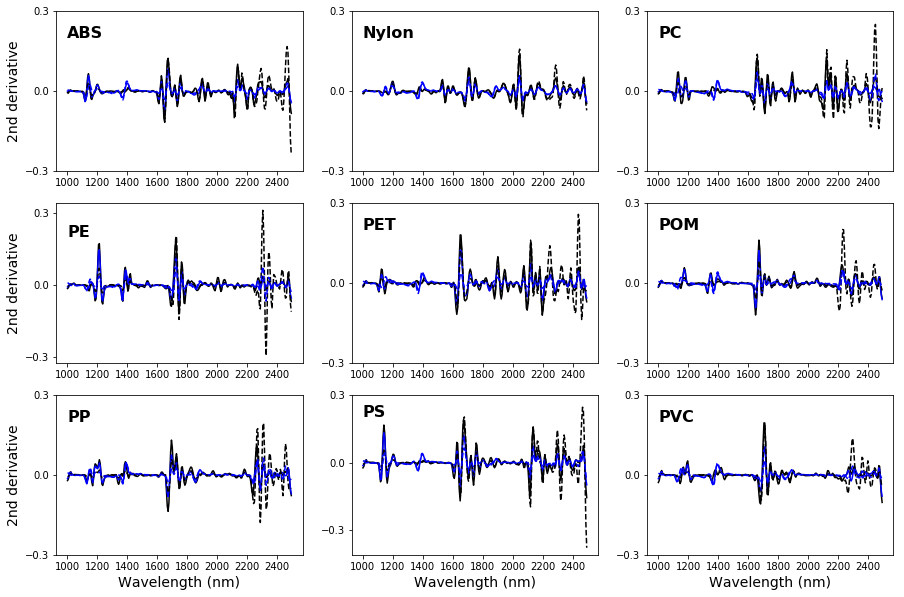

In [22]:
plt.figure(figsize=(15, 10))

plt.subplot(3,3,1)
plt.plot(wl25.astype(np.float32), np.average(sg_LD25_ABS, axis=0), color='black', label='ABS')
plt.plot(wl25.astype(np.float32), np.average(sg_LW25_ABS, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(sg_SD25_ABS, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(sg_SW25_ABS, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.yticks([-0.3, 0, 0.3])
plt.text(1000, 0.2, 'ABS', fontsize=16, fontweight='bold')
plt.ylabel('2nd derivative', fontsize=14)

plt.subplot(3,3,2)
plt.plot(wl25.astype(np.float32), np.average(sg_LD25_Nylon, axis=0), color='black', label='Nylon')
plt.plot(wl25.astype(np.float32), np.average(sg_LW25_Nylon, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(sg_SD25_Nylon, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(sg_SW25_Nylon, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.yticks([-0.3, 0, 0.3])
plt.text(1000, 0.2, 'Nylon', fontsize=16, fontweight='bold')

plt.subplot(3,3,3)
plt.plot(wl25.astype(np.float32), np.average(sg_LD25_PC, axis=0), color='black', label='PC')
plt.plot(wl25.astype(np.float32), np.average(sg_LW25_PC, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(sg_SD25_PC, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(sg_SW25_PC, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.yticks([-0.3, 0, 0.3])
plt.text(1000, 0.2, 'PC', fontsize=16, fontweight='bold')

plt.subplot(3,3,4)
plt.plot(wl25.astype(np.float32), np.average(sg_LD25_PE, axis=0), color='black', label='PE')
plt.plot(wl25.astype(np.float32), np.average(sg_LW25_PE, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(sg_SD25_PE, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(sg_SW25_PE, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.yticks([-0.3, 0, 0.3])
plt.text(1000, 0.2, 'PE', fontsize=16, fontweight='bold')
plt.ylabel('2nd derivative', fontsize=14)

plt.subplot(3,3,5)
plt.plot(wl25.astype(np.float32), np.average(sg_LD25_PET, axis=0), color='black', label='PET')
plt.plot(wl25.astype(np.float32), np.average(sg_LW25_PET, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(sg_SD25_PET, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(sg_SW25_PET, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.yticks([-0.3, 0, 0.3])
plt.text(1000, 0.2, 'PET', fontsize=16, fontweight='bold')

plt.subplot(3,3,6)
plt.plot(wl25.astype(np.float32), np.average(sg_LD25_POM, axis=0), color='black', label='POM')
plt.plot(wl25.astype(np.float32), np.average(sg_LW25_POM, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(sg_SD25_POM, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(sg_SW25_POM, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.yticks([-0.3, 0, 0.3])
plt.text(1000, 0.2, 'POM', fontsize=16, fontweight='bold')

plt.subplot(3,3,7)
plt.plot(wl25.astype(np.float32), np.average(sg_LD25_PP, axis=0), color='black', label='PP')
plt.plot(wl25.astype(np.float32), np.average(sg_LW25_PP, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(sg_SD25_PP, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(sg_SW25_PP, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.yticks([-0.3, 0, 0.3])
plt.text(1000, 0.2, 'PP', fontsize=16, fontweight='bold')
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('2nd derivative', fontsize=14)

plt.subplot(3,3,8)
plt.plot(wl25.astype(np.float32), np.average(sg_LD25_PS, axis=0), color='black', label='PS')
plt.plot(wl25.astype(np.float32), np.average(sg_LW25_PS, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(sg_SD25_PS, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(sg_SW25_PS, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.yticks([-0.3, 0, 0.3])
plt.text(1000, 0.2, 'PS', fontsize=16, fontweight='bold')
plt.xlabel('Wavelength (nm)', fontsize=14)

plt.subplot(3,3,9)
plt.plot(wl25.astype(np.float32), np.average(sg_LD25_PVC, axis=0), color='black', label='PVC')
plt.plot(wl25.astype(np.float32), np.average(sg_LW25_PVC, axis=0), color='blue')
plt.plot(wl25.astype(np.float32), np.average(sg_SD25_PVC, axis=0), color='black',linestyle = "dashed")
plt.plot(wl25.astype(np.float32), np.average(sg_SW25_PVC, axis=0), color='blue',linestyle = "dashed")
plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.yticks([-0.3, 0, 0.3])
plt.text(1000, 0.2, 'PVC', fontsize=16, fontweight='bold')
plt.xlabel('Wavelength (nm)', fontsize=14)

plt.subplots_adjust(hspace=0.2)

___

# PCA (Principal Component Analysis)

## PCA on Dataset L-D in the region of 1000-1700 nm wavelength (Figure S5a)

In [23]:
pca_LD17 = PCA(n_components=2)
X = pca_LD17.fit(sg_LD17)
scores_LD17= X.fit_transform(sg_LD17)

pca_LD17.explained_variance_ratio_

array([0.57430452, 0.18655983])

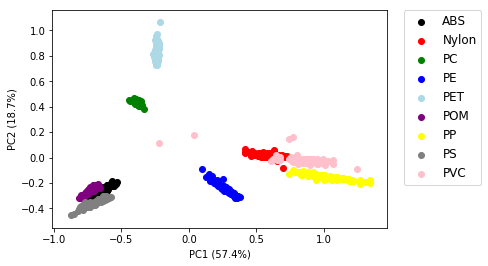

In [24]:
plt.scatter(scores_LD17[0:100,0], scores_LD17[0:100,1], color='black', label='ABS')
plt.scatter(scores_LD17[100:200,0], scores_LD17[100:200,1], color='red', label='Nylon')
plt.scatter(scores_LD17[200:300,0], scores_LD17[200:300,1], color='green', label='PC')
plt.scatter(scores_LD17[300:400,0], scores_LD17[300:400,1], color='blue', label='PE')
plt.scatter(scores_LD17[400:500,0], scores_LD17[400:500,1], color='lightblue', label='PET')
plt.scatter(scores_LD17[500:600,0], scores_LD17[500:600,1], color='purple', label='POM')
plt.scatter(scores_LD17[600:700,0], scores_LD17[600:700,1], color='yellow', label='PP')
plt.scatter(scores_LD17[700:800,0], scores_LD17[700:800,1], color='gray', label='PS')
plt.scatter(scores_LD17[800:900,0], scores_LD17[800:900,1], color='pink', label='PVC')

plt.xlabel('PC1 (57.4%)')
plt.ylabel('PC2 (18.7%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

## PCA loading plot of PC1 and PC2 of PCA analysis on Dataset L-D in the region of 1000-1700 nm wavelength (Figure S7a)

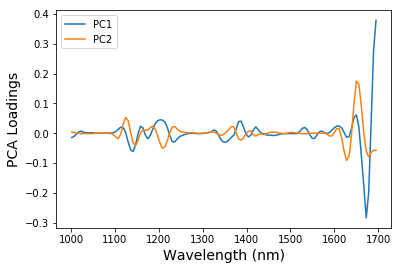

In [25]:
loadings_LD17=pca_LD17.components_.T*np.sqrt(pca_LD17.explained_variance_)

plt.plot(wl17.astype(np.float32), loadings_LD17[:,0], label='PC1')
plt.plot(wl17.astype(np.float32), loadings_LD17[:,1], label='PC2')

plt.xticks([1000, 1100,1200, 1300, 1400, 1500, 1600, 1700])
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('PCA Loadings', fontsize=14)
plt.legend()

## PCA on Dataset L-W in the range of 1000-1700 nm wavelength (Figure S5b)

In [26]:
pca_LW17 = PCA(n_components=2)
X = pca_LW17.fit(sg_LW17)
scores_LW17= X.fit_transform(sg_LW17)

pca_LW17.explained_variance_ratio_

array([0.49534482, 0.2518486 ])

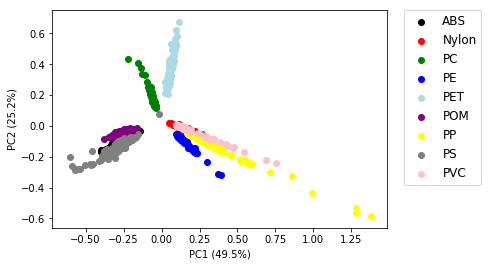

In [27]:
plt.scatter(scores_LW17[0:100,0], scores_LW17[0:100,1], color='black', label='ABS')
plt.scatter(scores_LW17[100:200,0], scores_LW17[100:200,1], color='red', label='Nylon')
plt.scatter(scores_LW17[200:300,0], scores_LW17[200:300,1], color='green', label='PC')
plt.scatter(scores_LW17[300:400,0], scores_LW17[300:400,1], color='blue', label='PE')
plt.scatter(scores_LW17[400:500,0], scores_LW17[400:500,1], color='lightblue', label='PET')
plt.scatter(scores_LW17[500:600,0], scores_LW17[500:600,1], color='purple', label='POM')
plt.scatter(scores_LW17[600:700,0], scores_LW17[600:700,1], color='yellow', label='PP')
plt.scatter(scores_LW17[700:800,0], scores_LW17[700:800,1], color='gray', label='PS')
plt.scatter(scores_LW17[800:900,0], scores_LW17[800:900,1], color='pink', label='PVC')

plt.xlabel('PC1 (49.5%)')
plt.ylabel('PC2 (25.2%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

## PCA loading plot of PC1 and PC2 of PCA analysis on Dataset L-W in the region of 1000-1700 nm wavelength (Figure S7b)

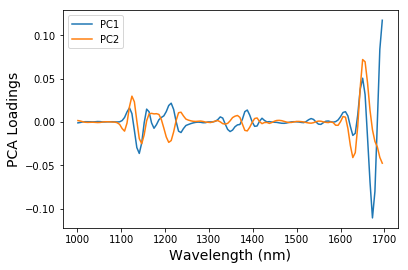

In [28]:
loadings_LW17=pca_LW17.components_.T*np.sqrt(pca_LW17.explained_variance_)

plt.plot(wl17.astype(np.float32), loadings_LW17[:,0], label='PC1')
plt.plot(wl17.astype(np.float32), loadings_LW17[:,1], label='PC2')

plt.xticks([1000, 1100,1200, 1300, 1400, 1500, 1600, 1700])
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('PCA Loadings', fontsize=14)
plt.legend()

## PCA on Dataset S-D in the range of 1000-1700 nm wavelength (Figure S5c)

In [29]:
pca_SD17 = PCA(n_components=2)
X = pca_SD17.fit(sg_SD17)
scores_SD17= X.fit_transform(sg_SD17)

pca_SD17.explained_variance_ratio_

array([0.60887104, 0.19179136])

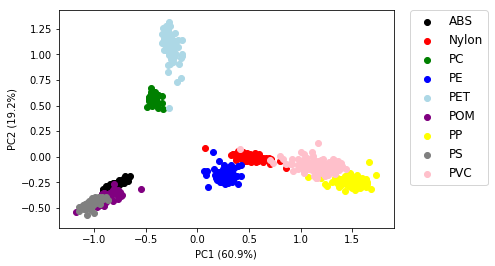

In [30]:
plt.scatter(scores_SD17[0:100,0], scores_SD17[0:100,1], color='black', label='ABS')
plt.scatter(scores_SD17[100:200,0], scores_SD17[100:200,1], color='red', label='Nylon')
plt.scatter(scores_SD17[200:300,0], scores_SD17[200:300,1], color='green', label='PC')
plt.scatter(scores_SD17[300:400,0], scores_SD17[300:400,1], color='blue', label='PE')
plt.scatter(scores_SD17[400:500,0], scores_SD17[400:500,1], color='lightblue', label='PET')
plt.scatter(scores_SD17[500:600,0], scores_SD17[500:600,1], color='purple', label='POM')
plt.scatter(scores_SD17[600:700,0], scores_SD17[600:700,1], color='yellow', label='PP')
plt.scatter(scores_SD17[700:800,0], scores_SD17[700:800,1], color='gray', label='PS')
plt.scatter(scores_SD17[800:900,0], scores_SD17[800:900,1], color='pink', label='PVC')

plt.xlabel('PC1 (60.9%)')
plt.ylabel('PC2 (19.2%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

## PCA loading plot of PC1 and PC2 of PCA analysis on Dataset S-D in the region of 1000-1700 nm wavelength (Figure S7c)

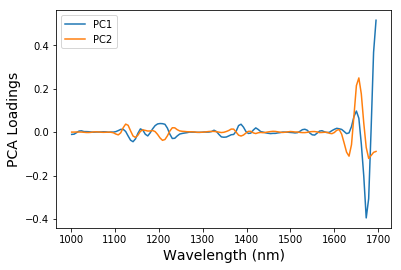

In [31]:
loadings_SD17=pca_SD17.components_.T*np.sqrt(pca_SD17.explained_variance_)

plt.plot(wl17.astype(np.float32), loadings_SD17[:,0], label='PC1')
plt.plot(wl17.astype(np.float32), loadings_SD17[:,1], label='PC2')

plt.xticks([1000, 1100,1200, 1300, 1400, 1500, 1600, 1700])
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('PCA Loadings', fontsize=14)
plt.legend()

## PCA on Dataset S-W in the range of 1000-1700 nm wavelength (Figure S5d)

In [32]:
pca_SW17 = PCA(n_components=2)
X = pca_SW17.fit(sg_SW17)
scores_SW17= X.fit_transform(sg_SW17)

pca_SW17.explained_variance_ratio_

array([0.54895658, 0.21203122])

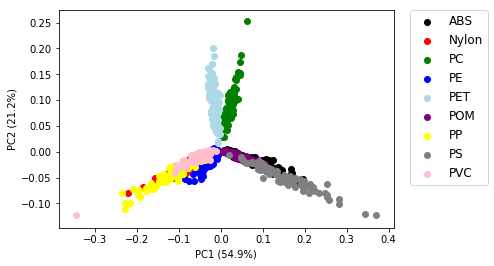

In [33]:
plt.scatter(scores_SW17[0:100,0], scores_SW17[0:100,1], color='black', label='ABS')
plt.scatter(scores_SW17[100:200,0], scores_SW17[100:200,1], color='red', label='Nylon')
plt.scatter(scores_SW17[200:300,0], scores_SW17[200:300,1], color='green', label='PC')
plt.scatter(scores_SW17[300:400,0], scores_SW17[300:400,1], color='blue', label='PE')
plt.scatter(scores_SW17[400:500,0], scores_SW17[400:500,1], color='lightblue', label='PET')
plt.scatter(scores_SW17[500:600,0], scores_SW17[500:600,1], color='purple', label='POM')
plt.scatter(scores_SW17[600:700,0], scores_SW17[600:700,1], color='yellow', label='PP')
plt.scatter(scores_SW17[700:800,0], scores_SW17[700:800,1], color='gray', label='PS')
plt.scatter(scores_SW17[800:900,0], scores_SW17[800:900,1], color='pink', label='PVC')

plt.xlabel('PC1 (54.9%)')
plt.ylabel('PC2 (21.2%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

## PCA loading plot of PC1 and PC2 of PCA analysis on Dataset S-W in the region of 1000-1700 nm wavelength (Figure S7d)

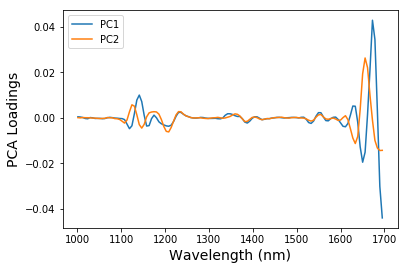

In [34]:
loadings_SW17=pca_SW17.components_.T*np.sqrt(pca_SW17.explained_variance_)

plt.plot(wl17.astype(np.float32), loadings_SW17[:,0], label='PC1')
plt.plot(wl17.astype(np.float32), loadings_SW17[:,1], label='PC2')

plt.xticks([1000, 1100,1200, 1300, 1400, 1500, 1600, 1700])
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('PCA Loadings', fontsize=14)
plt.legend()

## PCA on Dataset L-D in the range of 1000-2500 nm wavelength (Figure S6a)

In [35]:
pca_LD25 = PCA(n_components=2)
X = pca_LD25.fit(sg_LD25)
scores_LD25= X.fit_transform(sg_LD25)

pca_LD25.explained_variance_ratio_

array([0.3512487, 0.2067791])

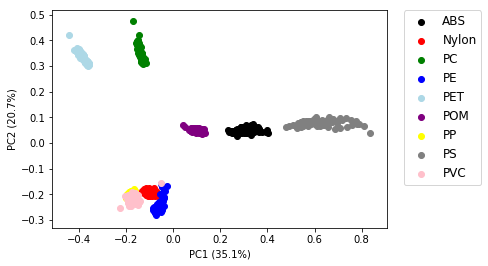

In [36]:
plt.scatter(scores_LD25[0:100,0], scores_LD25[0:100,1], color='black', label='ABS')
plt.scatter(scores_LD25[100:200,0], scores_LD25[100:200,1], color='red', label='Nylon')
plt.scatter(scores_LD25[200:300,0], scores_LD25[200:300,1], color='green', label='PC')
plt.scatter(scores_LD25[300:400,0], scores_LD25[300:400,1], color='blue', label='PE')
plt.scatter(scores_LD25[400:500,0], scores_LD25[400:500,1], color='lightblue', label='PET')
plt.scatter(scores_LD25[500:600,0], scores_LD25[500:600,1], color='purple', label='POM')
plt.scatter(scores_LD25[600:700,0], scores_LD25[600:700,1], color='yellow', label='PP')
plt.scatter(scores_LD25[700:800,0], scores_LD25[700:800,1], color='gray', label='PS')
plt.scatter(scores_LD25[800:900,0], scores_LD25[800:900,1], color='pink', label='PVC')

plt.xlabel('PC1 (35.1%)')
plt.ylabel('PC2 (20.7%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

## PCA loading plot of PC1 and PC2 of PCA analysis on Dataset L-D in the region of 1000-2500 nm wavelength (Figure S8a)

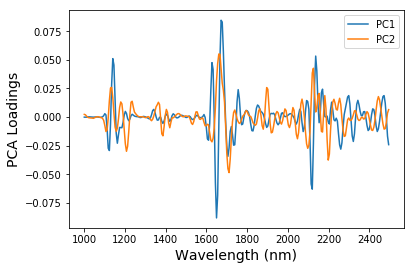

In [37]:
loadings_LD25=pca_LD25.components_.T*np.sqrt(pca_LD25.explained_variance_)

plt.plot(wl25.astype(np.float32), loadings_LD25[:,0], label='PC1')
plt.plot(wl25.astype(np.float32), loadings_LD25[:,1], label='PC2')

plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('PCA Loadings', fontsize=14)
plt.legend()

## PCA on Dataset L-W in the range of 1000-2500 nm wavelength (Figure S6b)

In [38]:
pca_LW25 = PCA(n_components=2)
X = pca_LW25.fit(sg_LW25)
scores_LW25= X.fit_transform(sg_LW25)

pca_LW25.explained_variance_ratio_

array([0.34782644, 0.19270652])

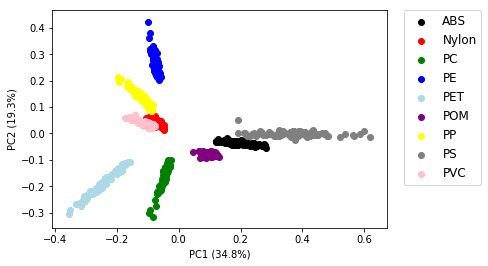

In [39]:
plt.scatter(scores_LW25[0:100,0], scores_LW25[0:100,1], color='black', label='ABS')
plt.scatter(scores_LW25[100:200,0], scores_LW25[100:200,1], color='red', label='Nylon')
plt.scatter(scores_LW25[200:300,0], scores_LW25[200:300,1], color='green', label='PC')
plt.scatter(scores_LW25[300:400,0], scores_LW25[300:400,1], color='blue', label='PE')
plt.scatter(scores_LW25[400:500,0], scores_LW25[400:500,1], color='lightblue', label='PET')
plt.scatter(scores_LW25[500:600,0], scores_LW25[500:600,1], color='purple', label='POM')
plt.scatter(scores_LW25[600:700,0], scores_LW25[600:700,1], color='yellow', label='PP')
plt.scatter(scores_LW25[700:800,0], scores_LW25[700:800,1], color='gray', label='PS')
plt.scatter(scores_LW25[800:900,0], scores_LW25[800:900,1], color='pink', label='PVC')

plt.xlabel('PC1 (34.8%)')
plt.ylabel('PC2 (19.3%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

## PCA loading plot of PC1 and PC2 of PCA analysis on Dataset L-W in the region of 1000-2500 nm wavelength (Figure S8b)

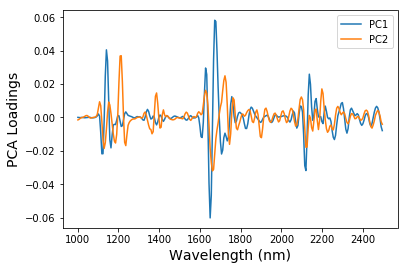

In [40]:
loadings_LW25=pca_LW25.components_.T*np.sqrt(pca_LW25.explained_variance_)

plt.plot(wl25.astype(np.float32), loadings_LW25[:,0], label='PC1')
plt.plot(wl25.astype(np.float32), loadings_LW25[:,1], label='PC2')

plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('PCA Loadings', fontsize=14)
plt.legend()

## PCA on Dataset S-D in the range of 1000-2500 nm wavelength (Figure S6c)

In [41]:
pca_SD25 = PCA(n_components=2)
X = pca_SD25.fit(sg_SD25)
scores_SD25= X.fit_transform(sg_SD25)

pca_SD25.explained_variance_ratio_

array([0.38778397, 0.1930803 ])

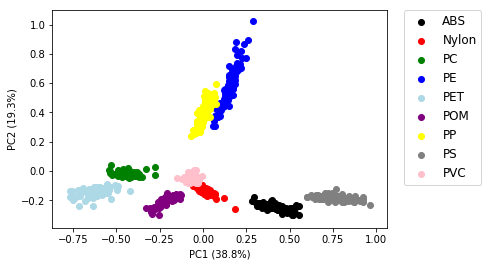

In [42]:
plt.scatter(scores_SD25[0:100,0], scores_SD25[0:100,1], color='black', label='ABS')
plt.scatter(scores_SD25[100:200,0], scores_SD25[100:200,1], color='red', label='Nylon')
plt.scatter(scores_SD25[200:300,0], scores_SD25[200:300,1], color='green', label='PC')
plt.scatter(scores_SD25[300:400,0], scores_SD25[300:400,1], color='blue', label='PE')
plt.scatter(scores_SD25[400:500,0], scores_SD25[400:500,1], color='lightblue', label='PET')
plt.scatter(scores_SD25[500:600,0], scores_SD25[500:600,1], color='purple', label='POM')
plt.scatter(scores_SD25[600:700,0], scores_SD25[600:700,1], color='yellow', label='PP')
plt.scatter(scores_SD25[700:800,0], scores_SD25[700:800,1], color='gray', label='PS')
plt.scatter(scores_SD25[800:900,0], scores_SD25[800:900,1], color='pink', label='PVC')

plt.xlabel('PC1 (38.8%)')
plt.ylabel('PC2 (19.3%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

## PCA loading plot of PC1 and PC2 of PCA analysis on Dataset S-D in the region of 1000-2500 nm wavelength (Figure S8c)

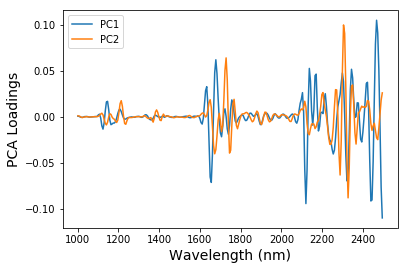

In [43]:
loadings_SD25=pca_SD25.components_.T*np.sqrt(pca_SD25.explained_variance_)

plt.plot(wl25.astype(np.float32), loadings_SD25[:,0], label='PC1')
plt.plot(wl25.astype(np.float32), loadings_SD25[:,1], label='PC2')

plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('PCA Loadings', fontsize=14)
plt.legend()

## PCA on Dataset S-W in the range of 1000-2500 nm wavelength (Figure S6d)

In [44]:
pca_SW25 = PCA(n_components=2)
X = pca_SW25.fit(sg_SW25)
scores_SW25= X.fit_transform(sg_SW25)

pca_SW25.explained_variance_ratio_

array([0.2625179 , 0.20890198])

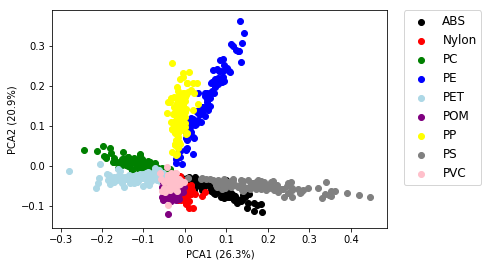

In [45]:
plt.scatter(scores_SW25[0:100,0], scores_SW25[0:100,1], color='black', label='ABS')
plt.scatter(scores_SW25[100:200,0], scores_SW25[100:200,1], color='red', label='Nylon')
plt.scatter(scores_SW25[200:300,0], scores_SW25[200:300,1], color='green', label='PC')
plt.scatter(scores_SW25[300:400,0], scores_SW25[300:400,1], color='blue', label='PE')
plt.scatter(scores_SW25[400:500,0], scores_SW25[400:500,1], color='lightblue', label='PET')
plt.scatter(scores_SW25[500:600,0], scores_SW25[500:600,1], color='purple', label='POM')
plt.scatter(scores_SW25[600:700,0], scores_SW25[600:700,1], color='yellow', label='PP')
plt.scatter(scores_SW25[700:800,0], scores_SW25[700:800,1], color='gray', label='PS')
plt.scatter(scores_SW25[800:900,0], scores_SW25[800:900,1], color='pink', label='PVC')

plt.xlabel('PCA1 (26.3%)')
plt.ylabel('PCA2 (20.9%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

## PCA loading plot of PC1 and PC2 of PCA analysis on Dataset S-W in the region of 1000-2500 nm wavelength (Figure S8d)

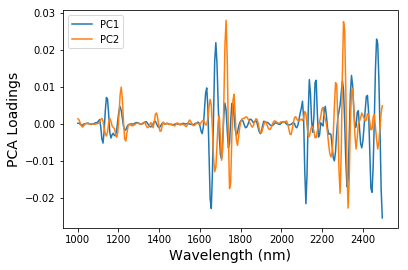

In [46]:
loadings_SW25=pca_SW25.components_.T*np.sqrt(pca_SW25.explained_variance_)

plt.plot(wl25.astype(np.float32), loadings_SW25[:,0], label='PC1')
plt.plot(wl25.astype(np.float32), loadings_SW25[:,1], label='PC2')

plt.xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('PCA Loadings', fontsize=14)
plt.legend()

___

# Constructing Classifivation models
**First, split into the traning and test data**

In [47]:
# convert 'polymer type' data (categorical data) inoto dummy variable

ohe = OneHotEncoder(sparse=False, categories='auto')
ohe.fit(info_LD['plastics'].values.reshape(-1, 1))
target= ohe.transform(info_LD['plastics'].values.reshape(-1, 1))

In [48]:
## split into the traning and test data (1:1)

X_train_LD17, X_test_LD17, y_train_LD17, y_test_LD17 = train_test_split(sg_LD17, target,test_size=0.5,shuffle=True,random_state=123,stratify=target)
X_train_LW17, X_test_LW17, y_train_LW17, y_test_LW17 = train_test_split(sg_LW17, target,test_size=0.5,shuffle=True,random_state=123,stratify=target)
X_train_SD17, X_test_SD17, y_train_SD17, y_test_SD17 = train_test_split(sg_SD17, target,test_size=0.5,shuffle=True,random_state=123,stratify=target)
X_train_SW17, X_test_SW17, y_train_SW17, y_test_SW17 = train_test_split(sg_SW17, target,test_size=0.5,shuffle=True,random_state=123,stratify=target)

X_train_LD25, X_test_LD25, y_train_LD25, y_test_LD25 = train_test_split(sg_LD25, target,test_size=0.5,shuffle=True,random_state=123,stratify=target)
X_train_LW25, X_test_LW25, y_train_LW25, y_test_LW25 = train_test_split(sg_LW25, target,test_size=0.5,shuffle=True,random_state=123,stratify=target)
X_train_SD25, X_test_SD25, y_train_SD25, y_test_SD25 = train_test_split(sg_SD25, target,test_size=0.5,shuffle=True,random_state=123,stratify=target)
X_train_SW25, X_test_SW25, y_train_SW25, y_test_SW25 = train_test_split(sg_SW25, target,test_size=0.5,shuffle=True,random_state=123,stratify=target)

## Constructing the classification model based on the data in the range of 1000-1700 nm wavelength

### based on Dataset L-D (1 mm particles on the dry filter)

In [49]:
# PLS-DA with cross validation
warnings.filterwarnings('ignore')

kf = KFold(n_splits=3, shuffle=True, random_state=123)

PRF=[]

for n_com in range(1,21):
    pls = PLSRegression(n_components=n_com)
    prf_ave=[]
    for train_index, test_index in kf.split(X_train_LD17, y_train_LD17):
        pls.fit(X_train_LD17[train_index], y_train_LD17[train_index])
        prf=precision_recall_fscore_support(ohe.inverse_transform(y_train_LD17[test_index]), ohe.inverse_transform(pls.predict(X_train_LD17[test_index])), average="macro")
        prf_ave.append(prf[:-1])
    PRF.append([pd.DataFrame(prf_ave)[0].mean(), pd.DataFrame(prf_ave)[1].mean(), pd.DataFrame(prf_ave)[2].mean()])

In [50]:
prf_LD17=pd.DataFrame(PRF, index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15','16','17','18','19','20'], columns=['Precision', 'Recall', 'F1 sore'])
prf_LD17

,Precision,Recall,F1 sore
1,0.084462,0.225309,0.083460
2,0.137405,0.337232,0.187672
3,0.290296,0.483431,0.330649
4,0.523280,0.666395,0.557309
5,0.710511,0.801170,0.736883
6,0.707171,0.793372,0.727901
7,0.870040,0.889506,0.855562
8,1.000000,1.000000,1.000000
9,0.998148,0.998148,0.998101
10,1.000000,1.000000,1.000000


When the numbers of components is 8, all indicesreach 0.98 and did not fall below 0.98 since then.

## Relationships between the number of components in the PLS analysis and evaluating indices (Precision, Recall, and F1 score) on Dataset L-D in the range of 1000-1700 nm wavelength (Figure S9a)

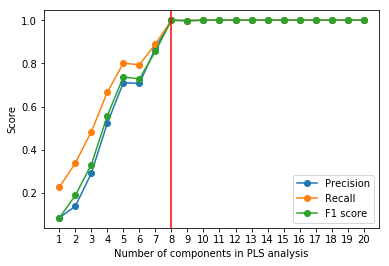

In [51]:
plt.plot(prf_LD17.iloc[:,0], marker='o',  label='Precision')
plt.plot(prf_LD17.iloc[:,1], marker='o',  label='Recall')
plt.plot(prf_LD17.iloc[:,2], marker='o',  label='F1 score')
         
plt.axvline(7, color='red')

plt.xlabel('Number of components in PLS analysis')
plt.ylabel('Score')
plt.legend()

In [52]:
# construct PLS-DA model
pls_LD17 = PLSRegression(n_components=8)
pls_LD17.fit(X_train_LD17, y_train_LD17)

PLSRegression(copy=True, max_iter=500, n_components=8, scale=True, tol=1e-06)

## The relationships between the absolute value of the PLS coefficients of the model based on Dataset L-D and the preprocessed spectra for each polymer type in the range of 1000–1700 nm (Figure S10)

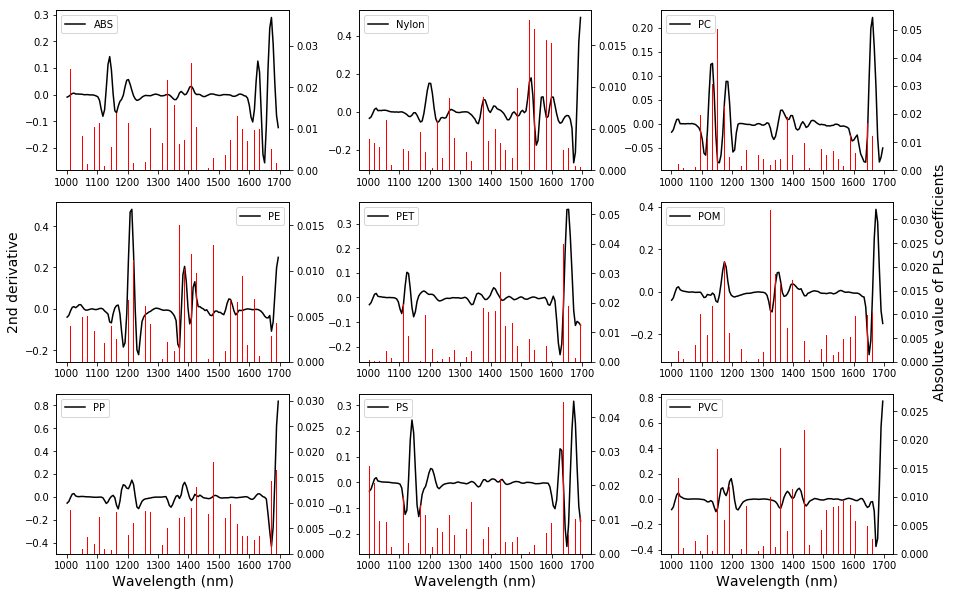

In [53]:
fig = plt.figure(figsize=(15, 10))

# ABS
ax1 = fig.add_subplot(3, 3, 1)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_LD17_ABS, axis=0), color='black', label='ABS')
ax2.bar(wl17.astype(np.float32), np.abs(pls_LD17.coef_[:,0]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.legend()


#Nylon
ax1 = fig.add_subplot(3, 3, 2)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_LD17_Nylon, axis=0), color='black', label='Nylon')
ax2.bar(wl17.astype(np.float32), np.abs(pls_LD17.coef_[:,1]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.legend()


#PC
ax1 = fig.add_subplot(3, 3, 3)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_LD17_PC, axis=0), color='black', label='PC')
ax2.bar(wl17.astype(np.float32), np.abs(pls_LD17.coef_[:,2]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.legend()


#PE
ax1 = fig.add_subplot(3, 3, 4)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_LD17_PE, axis=0), color='black', label='PE')
ax2.bar(wl17.astype(np.float32), np.abs(pls_LD17.coef_[:,3]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.set_ylabel('2nd derivative', fontsize=14)

ax1.legend()


#PET
ax1 = fig.add_subplot(3, 3, 5)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_LD17_PET, axis=0), color='black', label='PET')
ax2.bar(wl17.astype(np.float32), np.abs(pls_LD17.coef_[:,4]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.legend()


#POM
ax1 = fig.add_subplot(3, 3, 6)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_LD17_POM, axis=0), color='black', label='POM')
ax2.bar(wl17.astype(np.float32), np.abs(pls_LD17.coef_[:,5]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax2.set_ylabel('Absolute value of PLS coefficients', fontsize=14)

ax1.legend()


#PP
ax1 = fig.add_subplot(3, 3, 7)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_LD17_PP, axis=0), color='black', label='PP')
ax2.bar(wl17.astype(np.float32), np.abs(pls_LD17.coef_[:,6]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


#PS
ax1 = fig.add_subplot(3, 3, 8)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_LD17_PS, axis=0), color='black', label='PS')
ax2.bar(wl17.astype(np.float32), np.abs(pls_LD17.coef_[:,7]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


#PVC
ax1 = fig.add_subplot(3, 3, 9)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_LD17_PVC, axis=0), color='black', label='PVC')
ax2.bar(wl17.astype(np.float32), np.abs(pls_LD17.coef_[:,8]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.3)

**validate on Dataset L-D**

In [54]:
preds_LD17_LD= pls_LD17.predict(X_test_LD17)
prf_LD17_LD= precision_recall_fscore_support(ohe.inverse_transform(y_test_LD17), ohe.inverse_transform(preds_LD17_LD),average='macro')

print('Precision:', prf_LD17_LD[0])
print('Recall:', prf_LD17_LD[1])
print('F1-score:', prf_LD17_LD[2])

Precision: 0.9914529914529915
Recall: 0.991111111111111
F1-score: 0.9910839409525481


In [55]:
cm_LD17_LD = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_LD17), ohe.inverse_transform(preds_LD17_LD)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset L-W**

In [56]:
preds_LD17_LW= pls_LD17.predict(X_test_LW17)
prf_LD17_LW= precision_recall_fscore_support(ohe.inverse_transform(y_test_LW17), ohe.inverse_transform(preds_LD17_LW),average='macro')

print('Precision:', prf_LD17_LW[0])
print('Recall:', prf_LD17_LW[1])
print('F1-score:', prf_LD17_LW[2])

Precision: 0.9050917084680739
Recall: 0.5555555555555556
F1-score: 0.5378158296542102


In [57]:
cm_LD17_LW = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_LW17), ohe.inverse_transform(preds_LD17_LW)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset S-D**

In [58]:
preds_LD17_SD= pls_LD17.predict(X_test_SD17)
prf_LD17_SD= precision_recall_fscore_support(ohe.inverse_transform(y_test_SD17), ohe.inverse_transform(preds_LD17_SD),average='macro')

print('Precision:', prf_LD17_SD[0])
print('Recall:', prf_LD17_SD[1])
print('F1-score:', prf_LD17_SD[2])

Precision: 0.8844446080011681
Recall: 0.8755555555555555
F1-score: 0.8787788180199685


In [59]:
cm_LD17_SD = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_SD17), ohe.inverse_transform(preds_LD17_SD)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset S-W**

In [60]:
preds_LD17_SW= pls_LD17.predict(X_test_SW17)
prf_LD17_SW= precision_recall_fscore_support(ohe.inverse_transform(y_test_SW17), ohe.inverse_transform(preds_LD17_SW),average='macro')

print('Precision:', prf_LD17_SW[0])
print('Recall:', prf_LD17_SW[1])
print('F1-score:', prf_LD17_SW[2])

Precision: 0.34598835737787903
Recall: 0.13555555555555554
F1-score: 0.06694847178190587


In [61]:
cm_LD17_SW = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_SW17), ohe.inverse_transform(preds_LD17_SW)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

### based on Dataset L-W (1 mm particles on the wet filter)

In [62]:
# PLS-DA with cross validation
warnings.filterwarnings('ignore')

kf = KFold(n_splits=3, shuffle=True, random_state=123)

PRF=[]

for n_com in range(1,21):
    pls = PLSRegression(n_components=n_com)
    prf_ave=[]
    for train_index, test_index in kf.split(X_train_LW17, y_train_LW17):
        pls.fit(X_train_LW17[train_index], y_train_LW17[train_index])
        prf=precision_recall_fscore_support(ohe.inverse_transform(y_train_LW17[test_index]), ohe.inverse_transform(pls.predict(X_train_LW17[test_index])), average="macro")
        prf_ave.append(prf[:-1])
    PRF.append([pd.DataFrame(prf_ave)[0].mean(), pd.DataFrame(prf_ave)[1].mean(), pd.DataFrame(prf_ave)[2].mean()])

In [63]:
prf_LW17=pd.DataFrame(PRF, index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15','16','17','18','19','20'], columns=['Precision', 'Recall', 'F1 sore'])
prf_LW17

,Precision,Recall,F1 sore
1,0.094095,0.240741,0.114640
2,0.226072,0.373119,0.220480
3,0.408027,0.563678,0.421627
4,0.406926,0.567793,0.429732
5,0.568763,0.684752,0.584926
6,0.830077,0.884774,0.848436
7,0.987453,0.987202,0.986997
8,0.989268,0.989856,0.989402
9,0.992883,0.993416,0.993079
10,0.993174,0.993827,0.993041


When the numbers of components is 7, all indicesreach 0.98 and did not fall below 0.98 since then.

## Relationships between the number of components in the PLS analysis and evaluating indices (Precision, Recall, and F1 score) on Dataset L-W in the range of 1000-1700 nm wavelength (Figure S9b)

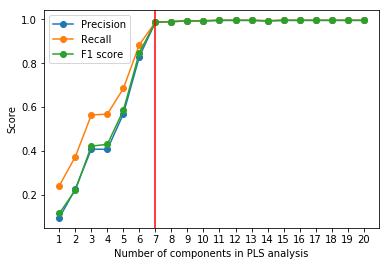

In [64]:
plt.plot(prf_LW17.iloc[:,0], marker='o',  label='Precision')
plt.plot(prf_LW17.iloc[:,1], marker='o',  label='Recall')
plt.plot(prf_LW17.iloc[:,2], marker='o',  label='F1 score')
         
plt.axvline(6, color='red')

plt.xlabel('Number of components in PLS analysis')
plt.ylabel('Score')
plt.legend()

In [65]:
# construct PLS-DA model
pls_LW17 = PLSRegression(n_components=7)
pls_LW17.fit(X_train_LW17, y_train_LW17)

PLSRegression(copy=True, max_iter=500, n_components=7, scale=True, tol=1e-06)

## The relationships between the absolute value of the PLS coefficients of the model based on Dataset L-W and the preprocessed spectra for each polymer type in the range of 1000–1700 nm (Figure S11)

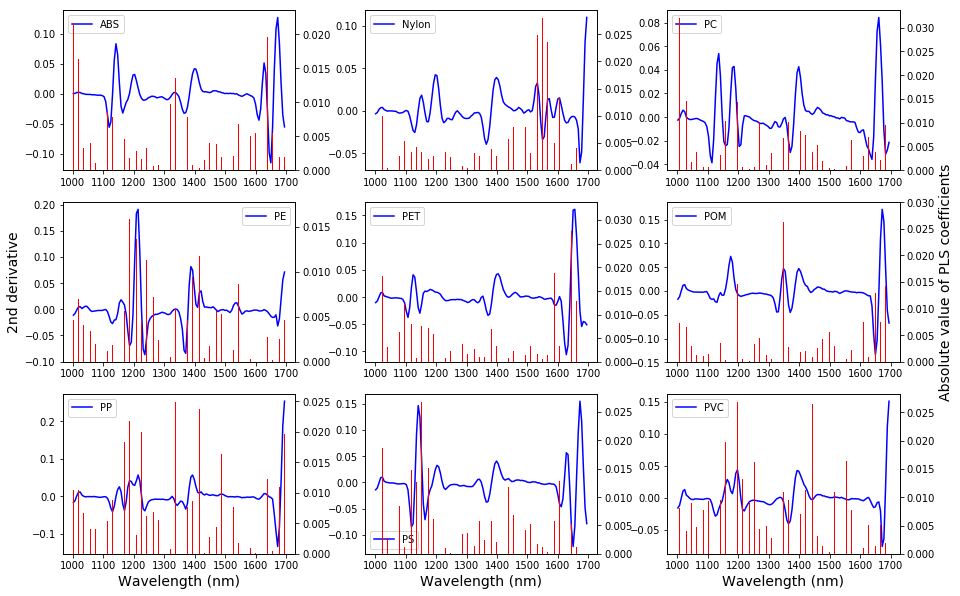

In [66]:
fig = plt.figure(figsize=(15, 10))

# ABS
ax1 = fig.add_subplot(3, 3, 1)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_LW17_ABS, axis=0), color='blue', label='ABS')
ax2.bar(wl17.astype(np.float32), np.abs(pls_LW17.coef_[:,0]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.legend()


#Nylon
ax1 = fig.add_subplot(3, 3, 2)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_LW17_Nylon, axis=0), color='blue', label='Nylon')
ax2.bar(wl17.astype(np.float32), np.abs(pls_LW17.coef_[:,1]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.legend()


#PC
ax1 = fig.add_subplot(3, 3, 3)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_LW17_PC, axis=0), color='blue', label='PC')
ax2.bar(wl17.astype(np.float32), np.abs(pls_LW17.coef_[:,2]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.legend()


#PE
ax1 = fig.add_subplot(3, 3, 4)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_LW17_PE, axis=0), color='blue', label='PE')
ax2.bar(wl17.astype(np.float32), np.abs(pls_LW17.coef_[:,3]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.set_ylabel('2nd derivative', fontsize=14)

ax1.legend()


#PET
ax1 = fig.add_subplot(3, 3, 5)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_LW17_PET, axis=0), color='blue', label='PET')
ax2.bar(wl17.astype(np.float32), np.abs(pls_LW17.coef_[:,4]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.legend()


#POM
ax1 = fig.add_subplot(3, 3, 6)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_LW17_POM, axis=0), color='blue', label='POM')
ax2.bar(wl17.astype(np.float32), np.abs(pls_LW17.coef_[:,5]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax2.set_ylabel('Absolute value of PLS coefficients', fontsize=14)

ax1.legend()


#PP
ax1 = fig.add_subplot(3, 3, 7)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_LW17_PP, axis=0), color='blue', label='PP')
ax2.bar(wl17.astype(np.float32), np.abs(pls_LW17.coef_[:,6]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


#PS
ax1 = fig.add_subplot(3, 3, 8)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_LW17_PS, axis=0), color='blue', label='PS')
ax2.bar(wl17.astype(np.float32), np.abs(pls_LW17.coef_[:,7]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


#PVC
ax1 = fig.add_subplot(3, 3, 9)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_LW17_PVC, axis=0), color='blue', label='PVC')
ax2.bar(wl17.astype(np.float32), np.abs(pls_LW17.coef_[:,8]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.3)

**validate on Dataset L-D**

In [67]:
preds_LW17_LD= pls_LW17.predict(X_test_LD17)
prf_LW17_LD= precision_recall_fscore_support(ohe.inverse_transform(y_test_LD17), ohe.inverse_transform(preds_LW17_LD),average='macro')

print('Precision:', prf_LW17_LD[0])
print('Recall:', prf_LW17_LD[1])
print('F1-score:', prf_LW17_LD[2])

Precision: 0.9346995596995598
Recall: 0.9177777777777778
F1-score: 0.9125037530817607


In [68]:
cm_LW17_LD = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_LD17), ohe.inverse_transform(preds_LW17_LD)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset L-W**

In [69]:
preds_LW17_LW= pls_LW17.predict(X_test_LW17)
prf_LW17_LW= precision_recall_fscore_support(ohe.inverse_transform(y_test_LW17), ohe.inverse_transform(preds_LW17_LW),average='macro')

print('Precision:', prf_LW17_LW[0])
print('Recall:', prf_LW17_LW[1])
print('F1-score:', prf_LW17_LW[2])

Precision: 0.9779202279202279
Recall: 0.9777777777777779
F1-score: 0.9777688853319106


In [70]:
cm_LW17_LW = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_LW17), ohe.inverse_transform(preds_LW17_LW)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset S-D**

In [71]:
preds_LW17_SD= pls_LW17.predict(X_test_SD17)
prf_LW17_SD= precision_recall_fscore_support(ohe.inverse_transform(y_test_SD17), ohe.inverse_transform(preds_LW17_SD),average='macro')

print('Precision:', prf_LW17_SD[0])
print('Recall:', prf_LW17_SD[1])
print('F1-score:', prf_LW17_SD[2])

Precision: 0.85914932046511
Recall: 0.8399999999999999
F1-score: 0.8246049855769425


In [72]:
cm_LW17_SD = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_SD17), ohe.inverse_transform(preds_LW17_SD)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Data S-W**

In [73]:
preds_LW17_SW= pls_LW17.predict(X_test_SW17)
prf_LW17_SW= precision_recall_fscore_support(ohe.inverse_transform(y_test_SW17), ohe.inverse_transform(preds_LW17_SW),average='macro')

print('Precision:', prf_LW17_SW[0])
print('Recall:', prf_LW17_SW[1])
print('F1-score:', prf_LW17_SW[2])

Precision: 0.5254268038403834
Recall: 0.37333333333333335
F1-score: 0.3059122185916984


In [74]:
cm_LW17_SW = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_SW17), ohe.inverse_transform(preds_LW17_SW)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

### based on Dataset S-D (100–500 µm particles on the dry filter)

In [75]:
# PLS-DA with cross validation
warnings.filterwarnings('ignore')

kf = KFold(n_splits=3, shuffle=True, random_state=123)

PRF=[]

for n_com in range(1,21):
    pls = PLSRegression(n_components=n_com)
    prf_ave=[]
    for train_index, test_index in kf.split(X_train_SD17, y_train_SD17):
        pls.fit(X_train_SD17[train_index], y_train_SD17[train_index])
        prf=precision_recall_fscore_support(ohe.inverse_transform(y_train_SD17[test_index]), ohe.inverse_transform(pls.predict(X_train_SD17[test_index])), average="macro")
        prf_ave.append(prf[:-1])
    PRF.append([pd.DataFrame(prf_ave)[0].mean(), pd.DataFrame(prf_ave)[1].mean(), pd.DataFrame(prf_ave)[2].mean()])

In [76]:
prf_SD17=pd.DataFrame(PRF, index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15','16','17','18','19','20'], columns=['Precision', 'Recall', 'F1 sore'])
prf_SD17

,Precision,Recall,F1 sore
1,0.085077,0.228395,0.088998
2,0.291918,0.452220,0.319408
3,0.379279,0.484034,0.354341
4,0.550362,0.678778,0.564344
5,0.637597,0.748538,0.661600
6,0.704418,0.785185,0.716254
7,0.868663,0.889748,0.854633
8,0.957672,0.926681,0.908593
9,0.980722,0.977599,0.977650
10,0.992518,0.991066,0.991389


When the numbers of components is 10, all indicesreach 0.98 and did not fall below 0.98 since then.

## Relationships between the number of components in the PLS analysis and evaluating indices (Precision, Recall, and F1 score) on Dataset S-D in the range of 1000-1700 nm wavelength (Figure S9c)

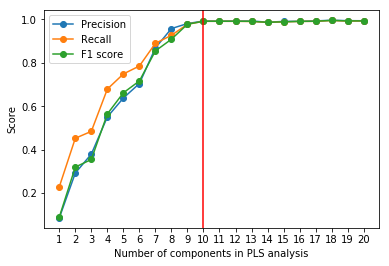

In [77]:
plt.plot(prf_SD17.iloc[:,0], marker='o',  label='Precision')
plt.plot(prf_SD17.iloc[:,1], marker='o',  label='Recall')
plt.plot(prf_SD17.iloc[:,2], marker='o',  label='F1 score')
         
plt.axvline(9, color='red')

plt.xlabel('Number of components in PLS analysis')
plt.ylabel('Score')
plt.legend()

In [78]:
# Construct PLS-DA model
pls_SD17 = PLSRegression(n_components=10)
pls_SD17.fit(X_train_SD17, y_train_SD17)

PLSRegression(copy=True, max_iter=500, n_components=10, scale=True, tol=1e-06)

## The relationships between the absolute value of the PLS coefficients of the model based on Dataset S-D and the preprocessed spectra for each polymer type in the range of 1000–1700 nm (Figure S12)

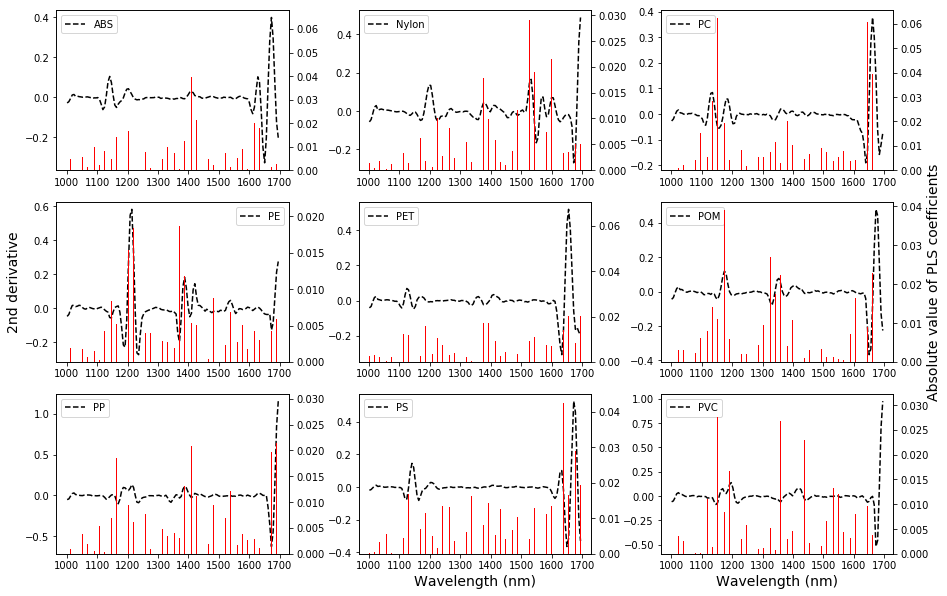

In [79]:
fig = plt.figure(figsize=(15, 10))

# ABS
ax1 = fig.add_subplot(3, 3, 1)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_SD17_ABS, axis=0), color='black',linestyle = "dashed", label='ABS')
ax2.bar(wl17.astype(np.float32), np.abs(pls_SD17.coef_[:,0]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.legend()


#Nylon
ax1 = fig.add_subplot(3, 3, 2)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_SD17_Nylon, axis=0), color='black',linestyle = "dashed", label='Nylon')
ax2.bar(wl17.astype(np.float32), np.abs(pls_SD17.coef_[:,1]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.legend()


#PC
ax1 = fig.add_subplot(3, 3, 3)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_SD17_PC, axis=0), color='black',linestyle = "dashed", label='PC')
ax2.bar(wl17.astype(np.float32), np.abs(pls_SD17.coef_[:,2]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.legend()


#PE
ax1 = fig.add_subplot(3, 3, 4)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_SD17_PE, axis=0), color='black',linestyle = "dashed", label='PE')
ax2.bar(wl17.astype(np.float32), np.abs(pls_SD17.coef_[:,3]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.set_ylabel('2nd derivative', fontsize=14)

ax1.legend()


#PET
ax1 = fig.add_subplot(3, 3, 5)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_SD17_PET, axis=0), color='black',linestyle = "dashed", label='PET')
ax2.bar(wl17.astype(np.float32), np.abs(pls_SD17.coef_[:,4]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.legend()


#POM
ax1 = fig.add_subplot(3, 3, 6)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_SD17_POM, axis=0), color='black',linestyle = "dashed", label='POM')
ax2.bar(wl17.astype(np.float32), np.abs(pls_SD17.coef_[:,5]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax2.set_ylabel('Absolute value of PLS coefficients', fontsize=14)

ax1.legend()


#PP
ax1 = fig.add_subplot(3, 3, 7)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_SD17_PP, axis=0), color='black',linestyle = "dashed", label='PP')
ax2.bar(wl17.astype(np.float32), np.abs(pls_SD17.coef_[:,6]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.legend()


#PS
ax1 = fig.add_subplot(3, 3, 8)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_SD17_PS, axis=0), color='black',linestyle = "dashed", label='PS')
ax2.bar(wl17.astype(np.float32), np.abs(pls_SD17.coef_[:,7]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


#PVC
ax1 = fig.add_subplot(3, 3, 9)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_SD17_PVC, axis=0), color='black',linestyle = "dashed", label='PVC')
ax2.bar(wl17.astype(np.float32), np.abs(pls_SD17.coef_[:,8]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.3)

**validate on Dataset L-D**

In [80]:
preds_SD17_LD= pls_SD17.predict(X_test_LD17)
prf_SD17_LD= precision_recall_fscore_support(ohe.inverse_transform(y_test_LD17), ohe.inverse_transform(preds_SD17_LD),average='macro')

print('Precision:', prf_SD17_LD[0])
print('Recall:', prf_SD17_LD[1])
print('F1-score:', prf_SD17_LD[2])

Precision: 0.9957264957264957
Recall: 0.9955555555555556
F1-score: 0.995553777066382


In [81]:
cm_SD17_LD = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_LD17), ohe.inverse_transform(preds_SD17_LD)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset L-W**

In [82]:
preds_SD17_LW= pls_SD17.predict(X_test_LW17)
prf_SD17_LW= precision_recall_fscore_support(ohe.inverse_transform(y_test_LW17), ohe.inverse_transform(preds_SD17_LW),average='macro')

print('Precision:', prf_SD17_LW[0])
print('Recall:', prf_SD17_LW[1])
print('F1-score:', prf_SD17_LW[2])

Precision: 0.9070304205327054
Recall: 0.7244444444444444
F1-score: 0.7211219995548172


In [83]:
cm_SD17_LW = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_LW17), ohe.inverse_transform(preds_SD17_LW)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset S-D**

In [84]:
preds_SD17_SD= pls_SD17.predict(X_test_SD17)
prf_SD17_SD= precision_recall_fscore_support(ohe.inverse_transform(y_test_SD17), ohe.inverse_transform(preds_SD17_SD),average='macro')

print('Precision:', prf_SD17_SD[0])
print('Recall:', prf_SD17_SD[1])
print('F1-score:', prf_SD17_SD[2])

Precision: 0.9872964752191806
Recall: 0.9866666666666666
F1-score: 0.9866452991452993


In [85]:
cm_SD17_SD = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_SD17), ohe.inverse_transform(preds_SD17_SD)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset S-W**

In [86]:
preds_SD17_SW= pls_SD17.predict(X_test_SW17)
prf_SD17_SW= precision_recall_fscore_support(ohe.inverse_transform(y_test_SW17), ohe.inverse_transform(preds_SD17_SW),average='macro')

print('Precision:', prf_SD17_SW[0])
print('Recall:', prf_SD17_SW[1])
print('F1-score:', prf_SD17_SW[2])

Precision: 0.42676789057281816
Recall: 0.22444444444444445
F1-score: 0.1424466398383266


In [87]:
cm_SD17_SW = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_SW17), ohe.inverse_transform(preds_SD17_SW)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POMN', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

### based on Dataset S-W (100–500 µm particles on the wet filter)

In [88]:
# PLS-DA with cross validation
warnings.filterwarnings('ignore')

kf = KFold(n_splits=3, shuffle=True, random_state=123)

PRF=[]

for n_com in range(1,21):
    pls = PLSRegression(n_components=n_com)
    prf_ave=[]
    for train_index, test_index in kf.split(X_train_SW17, y_train_SW17):
        pls.fit(X_train_SW17[train_index], y_train_SW17[train_index])
        prf=precision_recall_fscore_support(ohe.inverse_transform(y_train_SW17[test_index]), ohe.inverse_transform(pls.predict(X_train_SW17[test_index])), average="macro")
        prf_ave.append(prf[:-1])
    PRF.append([pd.DataFrame(prf_ave)[0].mean(), pd.DataFrame(prf_ave)[1].mean(), pd.DataFrame(prf_ave)[2].mean()])

In [89]:
prf_SW17=pd.DataFrame(PRF, index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15','16','17','18','19','20'], columns=['Precision', 'Recall', 'F1 sore'])
prf_SW17

,Precision,Recall,F1 sore
1,0.116861,0.248452,0.124899
2,0.214037,0.404248,0.249972
3,0.342423,0.522628,0.378026
4,0.439018,0.598201,0.468940
5,0.636370,0.706509,0.618921
6,0.814052,0.837503,0.805847
7,0.854645,0.853683,0.826060
8,0.915311,0.900496,0.896608
9,0.919539,0.904814,0.901559
10,0.921017,0.910057,0.907088


When the numbers of components is 9, all indicesreach 0.90 and did not fall below 0.90 since then.

## Relationships between the number of components in the PLS analysis and evaluating indices (Precision, Recall, and F1 score) on Dataset S-W in the range of 1000-1700 nm wavelength (Figure S9d)

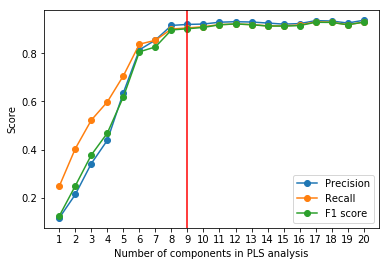

In [90]:
plt.plot(prf_SW17.iloc[:,0], marker='o',  label='Precision')
plt.plot(prf_SW17.iloc[:,1], marker='o',  label='Recall')
plt.plot(prf_SW17.iloc[:,2], marker='o',  label='F1 score')

plt.axvline(8, color='red')

plt.xlabel('Number of components in PLS analysis')
plt.ylabel('Score')
plt.legend()

In [91]:
# construct PLS-DA model
pls_SW17 = PLSRegression(n_components=9)
pls_SW17.fit(X_train_SW17, y_train_SW17)

PLSRegression(copy=True, max_iter=500, n_components=9, scale=True, tol=1e-06)

## The relationships between the absolute value of the PLS coefficients of the model based on Dataset S-W and the preprocessed spectra for each polymer type in the range of 1000–1700 nm (Figure S13)

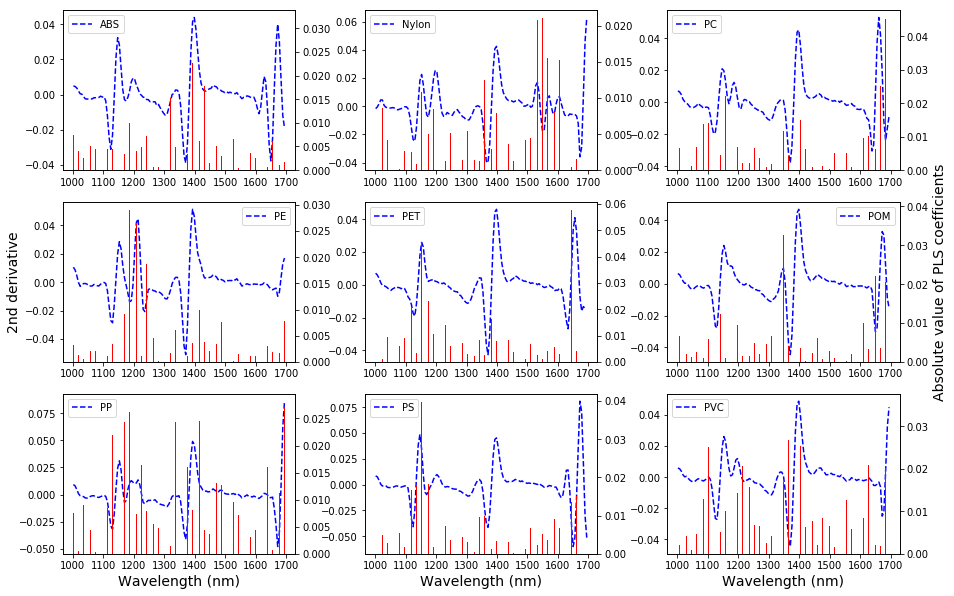

In [92]:
fig = plt.figure(figsize=(15, 10))

# ABS
ax1 = fig.add_subplot(3, 3, 1)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_SW17_ABS, axis=0), color='blue',linestyle = "dashed", label='ABS')
ax2.bar(wl17.astype(np.float32), np.abs(pls_SW17.coef_[:,0]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.legend()


#Nylon
ax1 = fig.add_subplot(3, 3, 2)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_SW17_Nylon, axis=0), color='blue',linestyle = "dashed", label='Nylon')
ax2.bar(wl17.astype(np.float32), np.abs(pls_SW17.coef_[:,1]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.legend()


#PC
ax1 = fig.add_subplot(3, 3, 3)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_SW17_PC, axis=0), color='blue',linestyle = "dashed", label='PC')
ax2.bar(wl17.astype(np.float32), np.abs(pls_SW17.coef_[:,2]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.legend()


#PE
ax1 = fig.add_subplot(3, 3, 4)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_SW17_PE, axis=0), color='blue',linestyle = "dashed", label='PE')
ax2.bar(wl17.astype(np.float32), np.abs(pls_SW17.coef_[:,3]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.set_ylabel('2nd derivative', fontsize=14)

ax1.legend()


#PET
ax1 = fig.add_subplot(3, 3, 5)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_SW17_PET, axis=0), color='blue',linestyle = "dashed", label='PET')
ax2.bar(wl17.astype(np.float32), np.abs(pls_SW17.coef_[:,4]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.legend()


#POM
ax1 = fig.add_subplot(3, 3, 6)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_SW17_POM, axis=0), color='blue',linestyle = "dashed", label='POM')
ax2.bar(wl17.astype(np.float32), np.abs(pls_SW17.coef_[:,5]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax2.set_ylabel('Absolute value of PLS coefficients', fontsize=14)

ax1.legend()


#PP
ax1 = fig.add_subplot(3, 3, 7)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_SW17_PP, axis=0), color='blue',linestyle = "dashed", label='PP')
ax2.bar(wl17.astype(np.float32), np.abs(pls_SW17.coef_[:,6]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


#PS
ax1 = fig.add_subplot(3, 3, 8)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_SW17_PS, axis=0), color='blue',linestyle = "dashed", label='PS')
ax2.bar(wl17.astype(np.float32), np.abs(pls_SW17.coef_[:,7]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


#PVC
ax1 = fig.add_subplot(3, 3, 9)
ax2 = ax1.twinx()

ax1.plot(wl17.astype(np.float32), np.average(sg_SW17_PVC, axis=0), color='blue',linestyle = "dashed", label='PVC')
ax2.bar(wl17.astype(np.float32), np.abs(pls_SW17.coef_[:,8]), color='red')

ax1.set_xticks([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.3)

**validate on Dataset L-D**

In [93]:
preds_SW17_LD= pls_SW17.predict(X_test_LD17)
prf_SW17_LD= precision_recall_fscore_support(ohe.inverse_transform(y_test_LD17), ohe.inverse_transform(preds_SW17_LD),average='macro')

print('Precision:', prf_SW17_LD[0])
print('Recall:', prf_SW17_LD[1])
print('F1-score:', prf_SW17_LD[2])

Precision: 0.9874960430515985
Recall: 0.9866666666666668
F1-score: 0.9864556479074627


In [94]:
cm_SW17_LD = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_LD17), ohe.inverse_transform(preds_SW17_LD)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset L-W**

In [95]:
preds_SW17_LW= pls_SW17.predict(X_test_LW17)
prf_SW17_LW= precision_recall_fscore_support(ohe.inverse_transform(y_test_LW17), ohe.inverse_transform(preds_SW17_LW),average='macro')

print('Precision:', prf_SW17_LW[0])
print('Recall:', prf_SW17_LW[1])
print('F1-score:', prf_SW17_LW[2])

Precision: 0.9570181661237263
Recall: 0.9422222222222223
F1-score: 0.9383046349136411


In [96]:
cm_SW17_LW = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_LW17), ohe.inverse_transform(preds_SW17_LW)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset S-D**

In [97]:
preds_SW17_SD= pls_SW17.predict(X_test_SD17)
prf_SW17_SD= precision_recall_fscore_support(ohe.inverse_transform(y_test_SD17), ohe.inverse_transform(preds_SW17_SD),average='macro')

print('Precision:', prf_SW17_SD[0])
print('Recall:', prf_SW17_SD[1])
print('F1-score:', prf_SW17_SD[2])

Precision: 0.9635448771723295
Recall: 0.9600000000000001
F1-score: 0.9594684261336083


In [98]:
cm_SW17_SD = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_SD17), ohe.inverse_transform(preds_SW17_SD)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset S-W**

In [99]:
preds_SW17_SW= pls_SW17.predict(X_test_SW17)
prf_SW17_SW= precision_recall_fscore_support(ohe.inverse_transform(y_test_SW17), ohe.inverse_transform(preds_SW17_SW),average='macro')

print('Precision:', prf_SW17_SW[0])
print('Recall:', prf_SW17_SW[1])
print('F1-score:', prf_SW17_SW[2])

Precision: 0.9387648872048923
Recall: 0.9311111111111112
F1-score: 0.9273295180488547


In [100]:
cm_SW17_SW = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_SW17), ohe.inverse_transform(preds_SW17_SW)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

## Confusion matrices of the classification models based on the spectral data in the range of 1000–1700 nm (Figure S18)

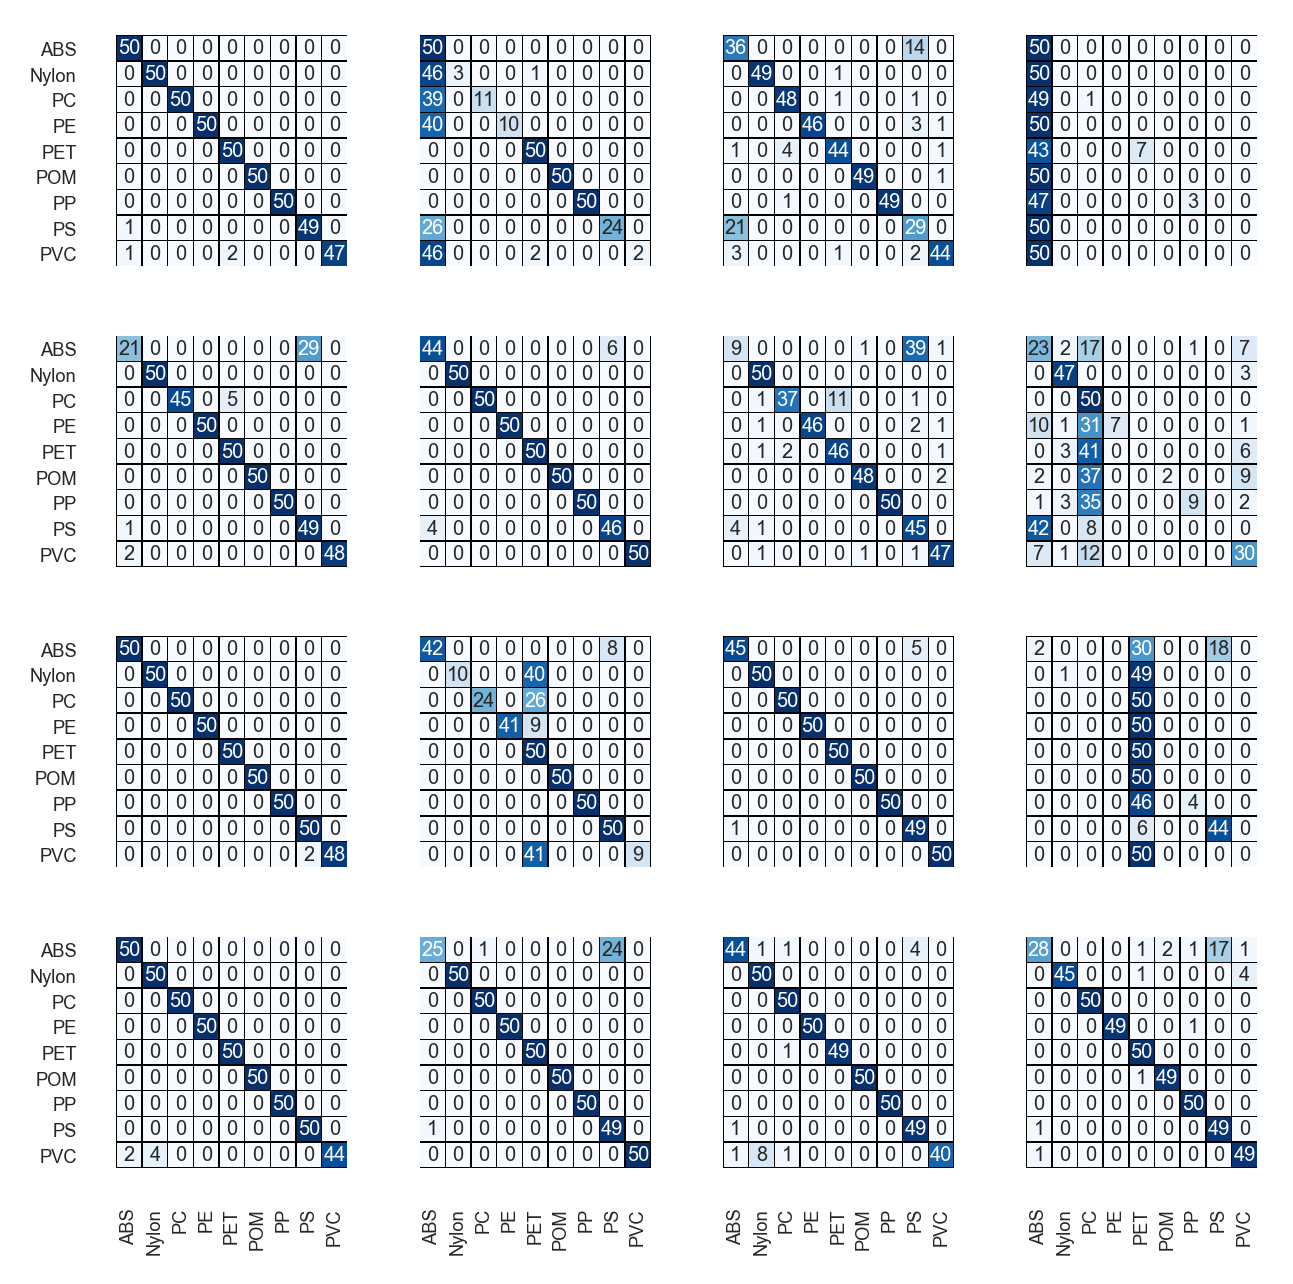

In [153]:
plt.figure(figsize=(5,5), dpi=300)

sns.set(font_scale=0.4)

plt.subplot(4,4,1)
sns.heatmap(cm_LD17_LD, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False)

plt.subplot(4,4,2)
sns.heatmap(cm_LD17_LW, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False ,yticklabels=False)

plt.subplot(4,4,3)
sns.heatmap(cm_LD17_SD, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False ,yticklabels=False)

plt.subplot(4,4,4)
sns.heatmap(cm_LD17_SW, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False ,yticklabels=False)

plt.subplot(4,4,5)
sns.heatmap(cm_LW17_LD, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False)

plt.subplot(4,4,6)
sns.heatmap(cm_LW17_LW, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False ,yticklabels=False)

plt.subplot(4,4,7)
sns.heatmap(cm_LW17_SD, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False ,yticklabels=False)

plt.subplot(4,4,8)
sns.heatmap(cm_LW17_SW, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False ,yticklabels=False)

plt.subplot(4,4,9)
sns.heatmap(cm_SD17_LD, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False)

plt.subplot(4,4,10)
sns.heatmap(cm_SD17_LW, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False ,yticklabels=False)

plt.subplot(4,4,11)
sns.heatmap(cm_SD17_SD, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False ,yticklabels=False)

plt.subplot(4,4,12)
sns.heatmap(cm_SD17_SW, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False ,yticklabels=False)

plt.subplot(4,4,13)
sns.heatmap(cm_SW17_LD, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False)

plt.subplot(4,4,14)
sns.heatmap(cm_SW17_LW, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False,yticklabels=False)

plt.subplot(4,4,15)
sns.heatmap(cm_SW17_SD, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False,yticklabels=False)

plt.subplot(4,4,16)
sns.heatmap(cm_SW17_SW, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False,yticklabels=False)

plt.subplots_adjust(hspace=0.3)

## Constructing the classification model based on the data in the range of 1000-2500 nm wavelength

### based on Dataset L-D (1 mm particles on the dry filter)

In [101]:
# PLS-DA with cross validation
warnings.filterwarnings('ignore')

kf = KFold(n_splits=3, shuffle=True, random_state=123)

PRF=[]

for n_com in range(1,21):
    pls = PLSRegression(n_components=n_com)
    prf_ave=[]
    for train_index, test_index in kf.split(X_train_LD25, y_train_LD25):
        pls.fit(X_train_LD25[train_index], y_train_LD25[train_index])
        prf=precision_recall_fscore_support(ohe.inverse_transform(y_train_LD25[test_index]), ohe.inverse_transform(pls.predict(X_train_LD25[test_index])), average="macro")
        prf_ave.append(prf[:-1])
    PRF.append([pd.DataFrame(prf_ave)[0].mean(), pd.DataFrame(prf_ave)[1].mean(), pd.DataFrame(prf_ave)[2].mean()])

In [102]:
prf_LD25=pd.DataFrame(PRF, index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15','16','25','18','19','20'], columns=['Precision', 'Recall', 'F1 sore'])
prf_LD25

,Precision,Recall,F1 sore
1,0.072934,0.231481,0.107772
2,0.124554,0.333333,0.178137
3,0.241922,0.477583,0.315189
4,0.478633,0.645503,0.525018
5,0.816743,0.869396,0.827738
6,0.832846,0.888889,0.851254
7,0.911116,0.903549,0.877541
8,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000
10,1.000000,1.000000,1.000000


When the numbers of components is 8, all indicesreach 0.98 and did not fall below 0.98 since then.

## Relationships between the number of components in the PLS analysis and evaluating indices (Precision, Recall, and F1 score) on Dataset L-D in the range of 1000-2500 nm wavelength (Figure S9e)

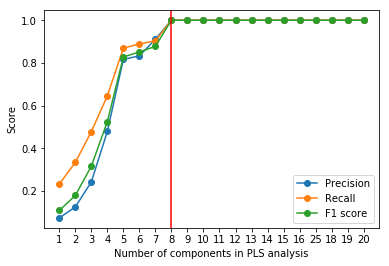

In [103]:
plt.plot(prf_LD25.iloc[:,0], marker='o',  label='Precision')
plt.plot(prf_LD25.iloc[:,1], marker='o',  label='Recall')
plt.plot(prf_LD25.iloc[:,2], marker='o',  label='F1 score')
         
plt.axvline(7, color='red')

plt.xlabel('Number of components in PLS analysis')
plt.ylabel('Score')
plt.legend()

In [104]:
# construct PLS-DA model
pls_LD25 = PLSRegression(n_components=8)
pls_LD25.fit(X_train_LD25, y_train_LD25)

PLSRegression(copy=True, max_iter=500, n_components=8, scale=True, tol=1e-06)

## The relationships between the absolute value of the PLS coefficients of the model based on Dataset L-D and the preprocessed spectra for each polymer type in the range of 1000–2500 nm (Figure S14)

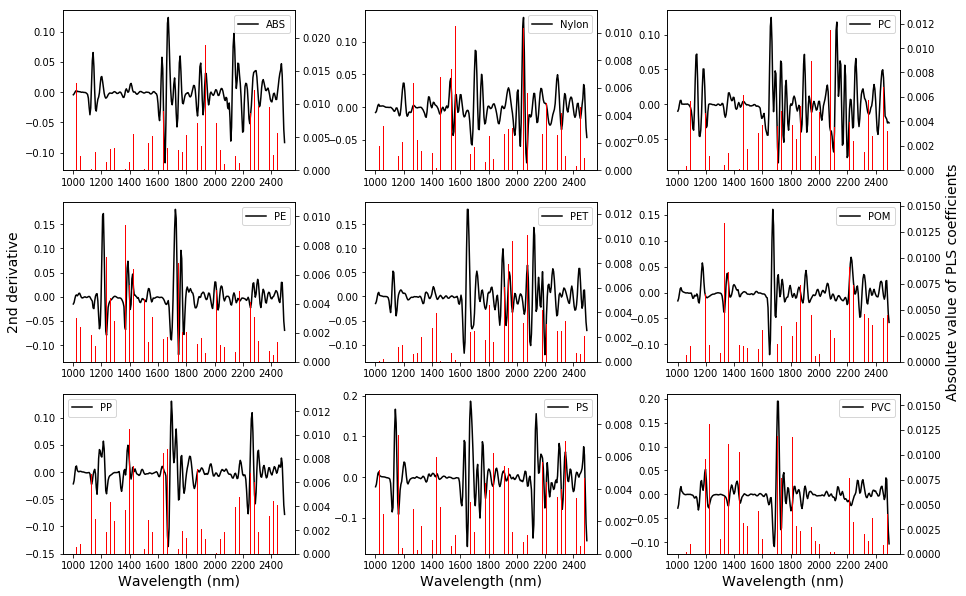

In [105]:
fig = plt.figure(figsize=(15, 10))

# ABS
ax1 = fig.add_subplot(3, 3, 1)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_LD25_ABS, axis=0), color='black', label='ABS')
ax2.bar(wl25.astype(np.float32), np.abs(pls_LD25.coef_[:,0]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.legend()


#Nylon
ax1 = fig.add_subplot(3, 3, 2)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_LD25_Nylon, axis=0), color='black', label='Nylon')
ax2.bar(wl25.astype(np.float32), np.abs(pls_LD25.coef_[:,1]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.legend()


#PC
ax1 = fig.add_subplot(3, 3, 3)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_LD25_PC, axis=0), color='black', label='PC')
ax2.bar(wl25.astype(np.float32), np.abs(pls_LD25.coef_[:,2]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.legend()


#PE
ax1 = fig.add_subplot(3, 3, 4)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_LD25_PE, axis=0), color='black', label='PE')
ax2.bar(wl25.astype(np.float32), np.abs(pls_LD25.coef_[:,3]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.set_ylabel('2nd derivative', fontsize=14)

ax1.legend()


#PET
ax1 = fig.add_subplot(3, 3, 5)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_LD25_PET, axis=0), color='black', label='PET')
ax2.bar(wl25.astype(np.float32), np.abs(pls_LD25.coef_[:,4]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.legend()


#POM
ax1 = fig.add_subplot(3, 3, 6)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_LD25_POM, axis=0), color='black', label='POM')
ax2.bar(wl25.astype(np.float32), np.abs(pls_LD25.coef_[:,5]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax2.set_ylabel('Absolute value of PLS coefficients', fontsize=14)

ax1.legend()


#PP
ax1 = fig.add_subplot(3, 3, 7)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_LD25_PP, axis=0), color='black', label='PP')
ax2.bar(wl25.astype(np.float32), np.abs(pls_LD25.coef_[:,6]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


#PS
ax1 = fig.add_subplot(3, 3, 8)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_LD25_PS, axis=0), color='black', label='PS')
ax2.bar(wl25.astype(np.float32), np.abs(pls_LD25.coef_[:,7]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


#PVC
ax1 = fig.add_subplot(3, 3, 9)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_LD25_PVC, axis=0), color='black', label='PVC')
ax2.bar(wl25.astype(np.float32), np.abs(pls_LD25.coef_[:,8]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.3)

**validate on Dataset L-D**

In [106]:
preds_LD25_LD= pls_LD25.predict(X_test_LD25)
prf_LD25_LD= precision_recall_fscore_support(ohe.inverse_transform(y_test_LD25), ohe.inverse_transform(preds_LD25_LD),average='macro')

print('Precision:', prf_LD25_LD[0])
print('Recall:', prf_LD25_LD[1])
print('F1-score:', prf_LD25_LD[2])

Precision: 0.9957264957264957
Recall: 0.9955555555555556
F1-score: 0.995553777066382


In [107]:
cm_LD25_LD = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_LD25), ohe.inverse_transform(preds_LD25_LD)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset L-W**

In [108]:
preds_LD25_LW= pls_LD25.predict(X_test_LW25)
prf_LD25_LW= precision_recall_fscore_support(ohe.inverse_transform(y_test_LW25), ohe.inverse_transform(preds_LD25_LW),average='macro')

print('Precision:', prf_LD25_LW[0])
print('Recall:', prf_LD25_LW[1])
print('F1-score:', prf_LD25_LW[2])

Precision: 0.9333955804544041
Recall: 0.8444444444444444
F1-score: 0.8508048202806279


In [109]:
cm_LD25_LW = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_LW25), ohe.inverse_transform(preds_LD25_LW)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset S-D**

In [110]:
preds_LD25_SD= pls_LD25.predict(X_test_SD25)
prf_LD25_SD= precision_recall_fscore_support(ohe.inverse_transform(y_test_SD25), ohe.inverse_transform(preds_LD25_SD),average='macro')

print('Precision:', prf_LD25_SD[0])
print('Recall:', prf_LD25_SD[1])
print('F1-score:', prf_LD25_SD[2])

Precision: 0.9012413624411422
Recall: 0.8555555555555556
F1-score: 0.8478835567583857


In [111]:
cm_LD25_SD = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_SD25), ohe.inverse_transform(preds_LD25_SD)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset S-W**

In [112]:
preds_LD25_SW= pls_LD25.predict(X_test_SW25)
prf_LD25_SW= precision_recall_fscore_support(ohe.inverse_transform(y_test_SW25), ohe.inverse_transform(preds_LD25_SW),average='macro')

print('Precision:', prf_LD25_SW[0])
print('Recall:', prf_LD25_SW[1])
print('F1-score:', prf_LD25_SW[2])

Precision: 0.5148117889130961
Recall: 0.40444444444444444
F1-score: 0.3700595531131061


In [113]:
cm_LD25_SW = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_SW25), ohe.inverse_transform(preds_LD25_SW)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

### based on Dataset L-W (1 mm particles on the wet filter)

In [114]:
# PLS-DA with cross validation
warnings.filterwarnings('ignore')

kf = KFold(n_splits=3, shuffle=True, random_state=123)

PRF=[]

for n_com in range(1,21):
    pls = PLSRegression(n_components=n_com)
    prf_ave=[]
    for train_index, test_index in kf.split(X_train_LW25, y_train_LW25):
        pls.fit(X_train_LW25[train_index], y_train_LW25[train_index])
        prf=precision_recall_fscore_support(ohe.inverse_transform(y_train_LW25[test_index]), ohe.inverse_transform(pls.predict(X_train_LW25[test_index])), average="macro")
        prf_ave.append(prf[:-1])
    PRF.append([pd.DataFrame(prf_ave)[0].mean(), pd.DataFrame(prf_ave)[1].mean(), pd.DataFrame(prf_ave)[2].mean()])

In [115]:
prf_LW25=pd.DataFrame(PRF, index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15','16','25','18','19','20'], columns=['Precision', 'Recall', 'F1 sore'])
prf_LW25

,Precision,Recall,F1 sore
1,0.081739,0.237654,0.112190
2,0.122939,0.333333,0.176558
3,0.288653,0.484568,0.329585
4,0.361544,0.558642,0.408719
5,0.800034,0.787349,0.732531
6,0.869717,0.893827,0.860547
7,0.997821,0.998051,0.997877
8,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000
10,0.997685,0.997942,0.997747


When the numbers of components is 7, all indicesreach 0.98 and did not fall below 0.98 since then.

## Relationships between the number of components in the PLS analysis and evaluating indices (Precision, Recall, and F1 score) on Dataset L-W in the range of 1000-2500 nm wavelength (Figure S9f)

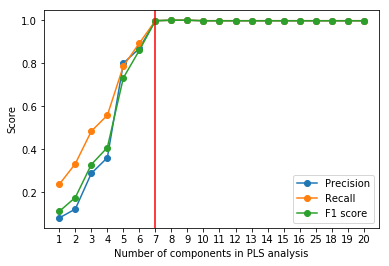

In [116]:
plt.plot(prf_LW25.iloc[:,0], marker='o',  label='Precision')
plt.plot(prf_LW25.iloc[:,1], marker='o',  label='Recall')
plt.plot(prf_LW25.iloc[:,2], marker='o',  label='F1 score')
         
plt.axvline(6, color='red')

plt.xlabel('Number of components in PLS analysis')
plt.ylabel('Score')
plt.legend()

In [117]:
# construct PLS-DA model
pls_LW25 = PLSRegression(n_components=7)
pls_LW25.fit(X_train_LW25, y_train_LW25)

PLSRegression(copy=True, max_iter=500, n_components=7, scale=True, tol=1e-06)

## The relationships between the absolute value of the PLS coefficients of the model based on Dataset L-W and the preprocessed spectra for each polymer type in the range of 1000–2500 nm (Figure S15)

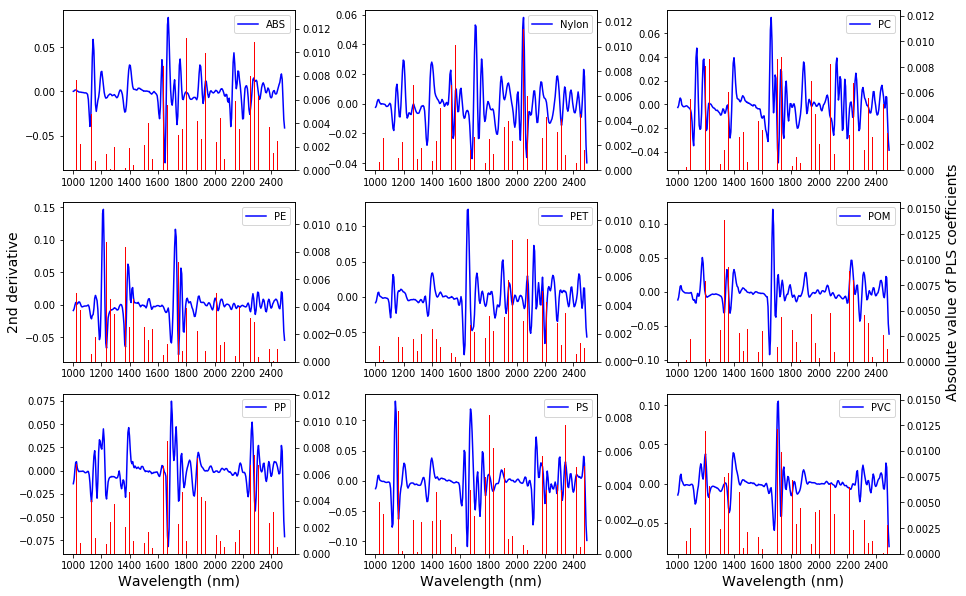

In [118]:
fig = plt.figure(figsize=(15, 10))

# ABS
ax1 = fig.add_subplot(3, 3, 1)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_LW25_ABS, axis=0), color='blue', label='ABS')
ax2.bar(wl25.astype(np.float32), np.abs(pls_LW25.coef_[:,0]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.legend()


#Nylon
ax1 = fig.add_subplot(3, 3, 2)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_LW25_Nylon, axis=0), color='blue', label='Nylon')
ax2.bar(wl25.astype(np.float32), np.abs(pls_LW25.coef_[:,1]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.legend()


#PC
ax1 = fig.add_subplot(3, 3, 3)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_LW25_PC, axis=0), color='blue', label='PC')
ax2.bar(wl25.astype(np.float32), np.abs(pls_LW25.coef_[:,2]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.legend()


#PE
ax1 = fig.add_subplot(3, 3, 4)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_LW25_PE, axis=0), color='blue', label='PE')
ax2.bar(wl25.astype(np.float32), np.abs(pls_LW25.coef_[:,3]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.set_ylabel('2nd derivative', fontsize=14)

ax1.legend()


#PET
ax1 = fig.add_subplot(3, 3, 5)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_LW25_PET, axis=0), color='blue', label='PET')
ax2.bar(wl25.astype(np.float32), np.abs(pls_LW25.coef_[:,4]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.legend()


#POM
ax1 = fig.add_subplot(3, 3, 6)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_LW25_POM, axis=0), color='blue', label='POM')
ax2.bar(wl25.astype(np.float32), np.abs(pls_LW25.coef_[:,5]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax2.set_ylabel('Absolute value of PLS coefficients', fontsize=14)

ax1.legend()


#PP
ax1 = fig.add_subplot(3, 3, 7)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_LW25_PP, axis=0), color='blue', label='PP')
ax2.bar(wl25.astype(np.float32), np.abs(pls_LW25.coef_[:,6]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


#PS
ax1 = fig.add_subplot(3, 3, 8)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_LW25_PS, axis=0), color='blue', label='PS')
ax2.bar(wl25.astype(np.float32), np.abs(pls_LW25.coef_[:,7]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


#PVC
ax1 = fig.add_subplot(3, 3, 9)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_LW25_PVC, axis=0), color='blue', label='PVC')
ax2.bar(wl25.astype(np.float32), np.abs(pls_LW25.coef_[:,8]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.3)

**validate on Dataset L-D**

In [119]:
preds_LW25_LD= pls_LW25.predict(X_test_LD25)
prf_LW25_LD= precision_recall_fscore_support(ohe.inverse_transform(y_test_LD25), ohe.inverse_transform(preds_LW25_LD),average='macro')

print('Precision:', prf_LW25_LD[0])
print('Recall:', prf_LW25_LD[1])
print('F1-score:', prf_LW25_LD[2])

Precision: 0.9957264957264957
Recall: 0.9955555555555556
F1-score: 0.995553777066382


In [120]:
cm_LW25_LD = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_LD25), ohe.inverse_transform(preds_LW25_LD)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dadaset L-W**

In [121]:
preds_LW25_LW= pls_LW25.predict(X_test_LW25)
prf_LW25_LW= precision_recall_fscore_support(ohe.inverse_transform(y_test_LW25), ohe.inverse_transform(preds_LW25_LW),average='macro')

print('Precision:', prf_LW25_LW[0])
print('Recall:', prf_LW25_LW[1])
print('F1-score:', prf_LW25_LW[2])

Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [122]:
cm_LW25_LW = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_LW25), ohe.inverse_transform(preds_LW25_LW)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset S-D**

In [123]:
preds_LW25_SD= pls_LW25.predict(X_test_SD25)
prf_LW25_SD= precision_recall_fscore_support(ohe.inverse_transform(y_test_SD25), ohe.inverse_transform(preds_LW25_SD),average='macro')

print('Precision:', prf_LW25_SD[0])
print('Recall:', prf_LW25_SD[1])
print('F1-score:', prf_LW25_SD[2])

Precision: 0.8945978984602578
Recall: 0.8044444444444444
F1-score: 0.7599973070160578


In [124]:
cm_LW25_SD = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_SD25), ohe.inverse_transform(preds_LW25_SD)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset S-W**

In [125]:
preds_LW25_SW= pls_LW25.predict(X_test_SW25)
prf_LW25_SW= precision_recall_fscore_support(ohe.inverse_transform(y_test_SW25), ohe.inverse_transform(preds_LW25_SW),average='macro')

print('Precision:', prf_LW25_SW[0])
print('Recall:', prf_LW25_SW[1])
print('F1-score:', prf_LW25_SW[2])

Precision: 0.7508093958558354
Recall: 0.6377777777777778
F1-score: 0.638268625968636


In [126]:
cm_LW25_SW = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_SW25), ohe.inverse_transform(preds_LW25_SW)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

### based on Dataset S-D (100–500 µm particles on the dry filter)

In [127]:
# PLS-DA with cross validation
warnings.filterwarnings('ignore')

kf = KFold(n_splits=3, shuffle=True, random_state=123)

PRF=[]

for n_com in range(1,21):
    pls = PLSRegression(n_components=n_com)
    prf_ave=[]
    for train_index, test_index in kf.split(X_train_SD25, y_train_SD25):
        pls.fit(X_train_SD25[train_index], y_train_SD25[train_index])
        prf=precision_recall_fscore_support(ohe.inverse_transform(y_train_SD25[test_index]), ohe.inverse_transform(pls.predict(X_train_SD25[test_index])), average="macro")
        prf_ave.append(prf[:-1])
    PRF.append([pd.DataFrame(prf_ave)[0].mean(), pd.DataFrame(prf_ave)[1].mean(), pd.DataFrame(prf_ave)[2].mean()])

In [128]:
prf_SD25=pd.DataFrame(PRF, index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15','16','25','18','19','20'], columns=['Precision', 'Recall', 'F1 sore'])
prf_SD25

,Precision,Recall,F1 sore
1,0.089633,0.231481,0.097575
2,0.159431,0.370370,0.212510
3,0.210612,0.446394,0.282220
4,0.588306,0.711416,0.615506
5,0.773818,0.851852,0.798579
6,0.813642,0.861598,0.816686
7,0.871903,0.896296,0.865233
8,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000
10,1.000000,1.000000,1.000000


When the numbers of components is 8, all indicesreach 0.98 and did not fall below 0.98 since then.

## Relationships between the number of components in the PLS analysis and evaluating indices (Precision, Recall, and F1 score) on Dataset S-D in the range of 1000-2500 nm wavelength (Figure S9g)

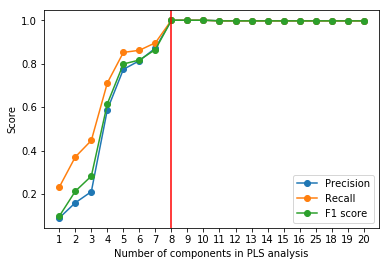

In [129]:
plt.plot(prf_SD25.iloc[:,0], marker='o',  label='Precision')
plt.plot(prf_SD25.iloc[:,1], marker='o',  label='Recall')
plt.plot(prf_SD25.iloc[:,2], marker='o',  label='F1 score')
         
plt.axvline(7, color='red')

plt.xlabel('Number of components in PLS analysis')
plt.ylabel('Score')
plt.legend()

In [130]:
# construct PLS-DA model
pls_SD25 = PLSRegression(n_components=8)
pls_SD25.fit(X_train_SD25, y_train_SD25)

PLSRegression(copy=True, max_iter=500, n_components=8, scale=True, tol=1e-06)

## The relationships between the absolute value of the PLS coefficients of the model based on Dataset S-D and the preprocessed spectra for each polymer type in the range of 1000–2500 nm (Figure S16)

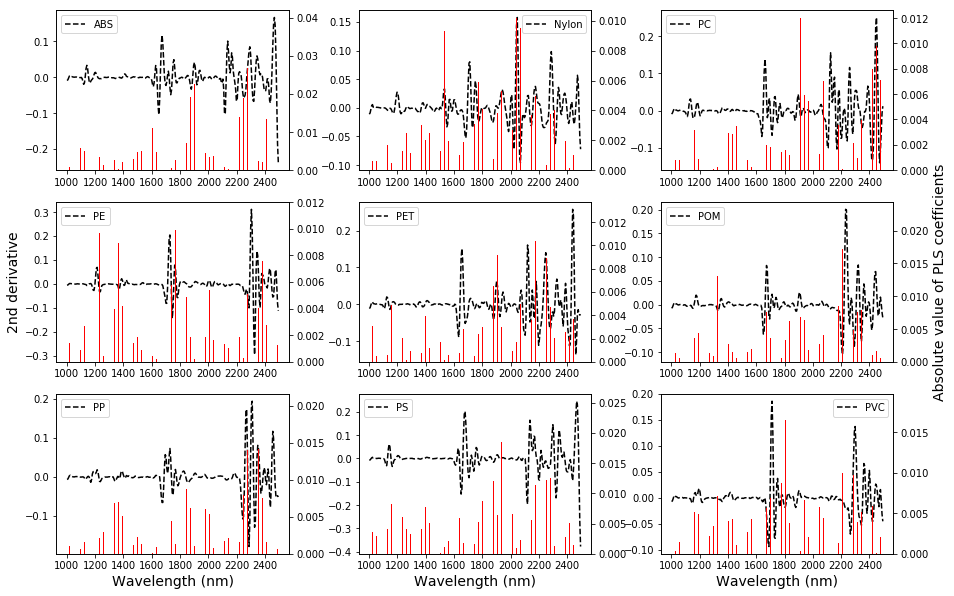

In [131]:
fig = plt.figure(figsize=(15, 10))

# ABS
ax1 = fig.add_subplot(3, 3, 1)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_SD25_ABS, axis=0), color='black',linestyle = "dashed", label='ABS')
ax2.bar(wl25.astype(np.float32), np.abs(pls_SD25.coef_[:,0]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.legend()


#Nylon
ax1 = fig.add_subplot(3, 3, 2)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_SD25_Nylon, axis=0), color='black',linestyle = "dashed", label='Nylon')
ax2.bar(wl25.astype(np.float32), np.abs(pls_SD25.coef_[:,1]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.legend()


#PC
ax1 = fig.add_subplot(3, 3, 3)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_SD25_PC, axis=0), color='black',linestyle = "dashed", label='PC')
ax2.bar(wl25.astype(np.float32), np.abs(pls_SD25.coef_[:,2]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.legend()


#PE
ax1 = fig.add_subplot(3, 3, 4)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_SD25_PE, axis=0), color='black',linestyle = "dashed", label='PE')
ax2.bar(wl25.astype(np.float32), np.abs(pls_SD25.coef_[:,3]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.set_ylabel('2nd derivative', fontsize=14)

ax1.legend()


#PET
ax1 = fig.add_subplot(3, 3, 5)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_SD25_PET, axis=0), color='black',linestyle = "dashed", label='PET')
ax2.bar(wl25.astype(np.float32), np.abs(pls_SD25.coef_[:,4]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.legend()


#POM
ax1 = fig.add_subplot(3, 3, 6)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_SD25_POM, axis=0), color='black',linestyle = "dashed", label='POM')
ax2.bar(wl25.astype(np.float32), np.abs(pls_SD25.coef_[:,5]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax2.set_ylabel('Absolute value of PLS coefficients', fontsize=14)

ax1.legend()


#PP
ax1 = fig.add_subplot(3, 3, 7)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_SD25_PP, axis=0), color='black',linestyle = "dashed", label='PP')
ax2.bar(wl25.astype(np.float32), np.abs(pls_SD25.coef_[:,6]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


#PS
ax1 = fig.add_subplot(3, 3, 8)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_SD25_PS, axis=0), color='black',linestyle = "dashed", label='PS')
ax2.bar(wl25.astype(np.float32), np.abs(pls_SD25.coef_[:,7]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


#PVC
ax1 = fig.add_subplot(3, 3, 9)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_SD25_PVC, axis=0), color='black',linestyle = "dashed", label='PVC')
ax2.bar(wl25.astype(np.float32), np.abs(pls_SD25.coef_[:,8]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.3)

**validate on Dataset L-D**

In [132]:
preds_SD25_LD= pls_SD25.predict(X_test_LD25)
prf_SD25_LD= precision_recall_fscore_support(ohe.inverse_transform(y_test_LD25), ohe.inverse_transform(preds_SD25_LD),average='macro')

print('Precision:', prf_SD25_LD[0])
print('Recall:', prf_SD25_LD[1])
print('F1-score:', prf_SD25_LD[2])

Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [133]:
cm_SD25_LD = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_LD25), ohe.inverse_transform(preds_SD25_LD)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset L-W**

In [134]:
preds_SD25_LW= pls_SD25.predict(X_test_LW25)
prf_SD25_LW= precision_recall_fscore_support(ohe.inverse_transform(y_test_LW25), ohe.inverse_transform(preds_SD25_LW),average='macro')

print('Precision:', prf_SD25_LW[0])
print('Recall:', prf_SD25_LW[1])
print('F1-score:', prf_SD25_LW[2])

Precision: 0.9748936611681711
Recall: 0.9688888888888889
F1-score: 0.9689944536810096


In [135]:
cm_SD25_LW = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_LW25), ohe.inverse_transform(preds_SD25_LW)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset S-D**

In [136]:
preds_SD25_SD= pls_SD25.predict(X_test_SD25)
prf_SD25_SD= precision_recall_fscore_support(ohe.inverse_transform(y_test_SD25), ohe.inverse_transform(preds_SD25_SD),average='macro')

print('Precision:', prf_SD25_SD[0])
print('Recall:', prf_SD25_SD[1])
print('F1-score:', prf_SD25_SD[2])

Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [137]:
cm_SD25_SD = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_SD25), ohe.inverse_transform(preds_SD25_SD)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset S-W**

In [138]:
preds_SD25_SW= pls_SD25.predict(X_test_SW25)
prf_SD25_SW= precision_recall_fscore_support(ohe.inverse_transform(y_test_SW25), ohe.inverse_transform(preds_SD25_SW),average='macro')

print('Precision:', prf_SD25_SW[0])
print('Recall:', prf_SD25_SW[1])
print('F1-score:', prf_SD25_SW[2])

Precision: 0.7783139676269448
Recall: 0.5111111111111112
F1-score: 0.5270178068551852


In [139]:
cm_SD25_SW = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_SW25), ohe.inverse_transform(preds_SD25_SW)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

### based on Dataset S-W (100–500 µm particles on the wet filter)

In [140]:
# PLS-DA with cross validation
warnings.filterwarnings('ignore')

kf = KFold(n_splits=3, shuffle=True, random_state=123)

PRF=[]

for n_com in range(1,21):
    pls = PLSRegression(n_components=n_com)
    prf_ave=[]
    for train_index, test_index in kf.split(X_train_SW25, y_train_SW25):
        pls.fit(X_train_SW25[train_index], y_train_SW25[train_index])
        prf=precision_recall_fscore_support(ohe.inverse_transform(y_train_SW25[test_index]), ohe.inverse_transform(pls.predict(X_train_SW25[test_index])), average="macro")
        prf_ave.append(prf[:-1])
    PRF.append([pd.DataFrame(prf_ave)[0].mean(), pd.DataFrame(prf_ave)[1].mean(), pd.DataFrame(prf_ave)[2].mean()])

In [141]:
prf_SW25=pd.DataFrame(PRF, index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15','16','25','18','19','20'], columns=['Precision', 'Recall', 'F1 sore'])
prf_SW25

,Precision,Recall,F1 sore
1,0.107602,0.249763,0.112426
2,0.176457,0.344444,0.196752
3,0.303211,0.520165,0.371433
4,0.488019,0.631925,0.521488
5,0.739444,0.775388,0.716183
6,0.792393,0.840500,0.801911
7,0.809336,0.863677,0.826202
8,0.968972,0.961127,0.961717
9,0.994972,0.995872,0.995273
10,0.997821,0.998051,0.997877


When the numbers of components is 9, all indicesreach 0.98 and did not fall below 0.98 since then.

## Relationships between the number of components in the PLS analysis and evaluating indices (Precision, Recall, and F1 score) on Dataset S-W in the range of 1000-2500 nm wavelength (Figure S9h)

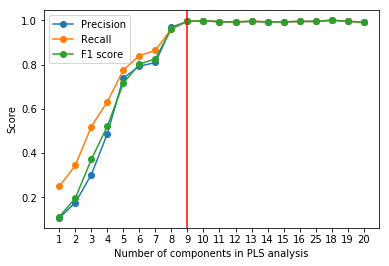

In [142]:
plt.plot(prf_SW25.iloc[:,0], marker='o',  label='Precision')
plt.plot(prf_SW25.iloc[:,1], marker='o',  label='Recall')
plt.plot(prf_SW25.iloc[:,2], marker='o',  label='F1 score')
         
plt.axvline(8, color='red')

plt.xlabel('Number of components in PLS analysis')
plt.ylabel('Score')
plt.legend()

In [143]:
# construct PLS-DA model
pls_SW25 = PLSRegression(n_components=9)
pls_SW25.fit(X_train_SW25, y_train_SW25)

PLSRegression(copy=True, max_iter=500, n_components=9, scale=True, tol=1e-06)

## The relationships between the absolute value of the PLS coefficients of the model based on Dataset L-W and the preprocessed spectra for each polymer type in the range of 1000–2500 nm (Figure S17)

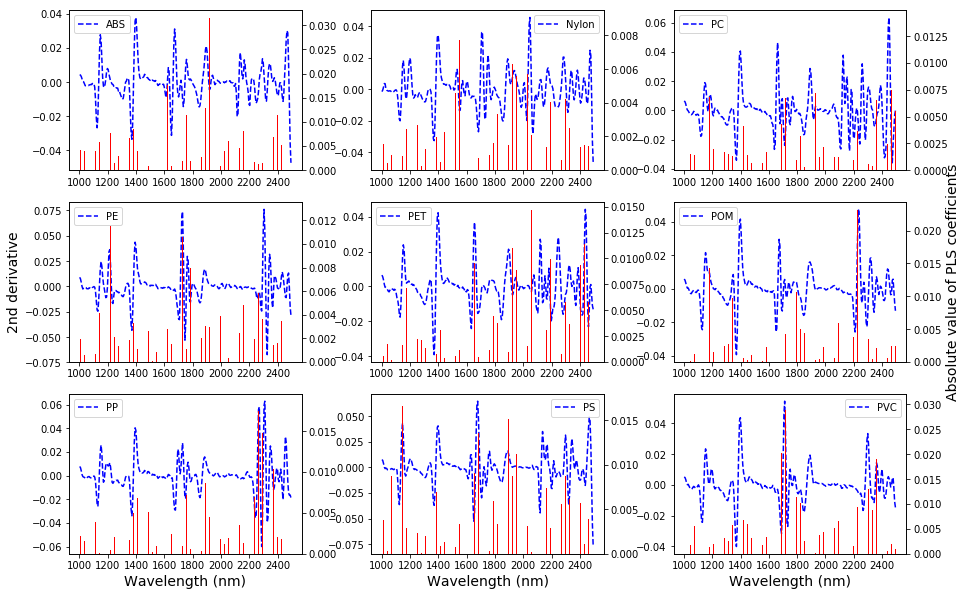

In [144]:
fig = plt.figure(figsize=(15, 10))

# ABS
ax1 = fig.add_subplot(3, 3, 1)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_SW25_ABS, axis=0), color='blue',linestyle = "dashed", label='ABS')
ax2.bar(wl25.astype(np.float32), np.abs(pls_SW25.coef_[:,0]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.legend()


#Nylon
ax1 = fig.add_subplot(3, 3, 2)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_SW25_Nylon, axis=0), color='blue',linestyle = "dashed", label='Nylon')
ax2.bar(wl25.astype(np.float32), np.abs(pls_SW25.coef_[:,1]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.legend()


#PC
ax1 = fig.add_subplot(3, 3, 3)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_SW25_PC, axis=0), color='blue',linestyle = "dashed", label='PC')
ax2.bar(wl25.astype(np.float32), np.abs(pls_SW25.coef_[:,2]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.legend()


#PE
ax1 = fig.add_subplot(3, 3, 4)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_SW25_PE, axis=0), color='blue',linestyle = "dashed", label='PE')
ax2.bar(wl25.astype(np.float32), np.abs(pls_SW25.coef_[:,3]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.set_ylabel('2nd derivative', fontsize=14)

ax1.legend()


#PET
ax1 = fig.add_subplot(3, 3, 5)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_SW25_PET, axis=0), color='blue',linestyle = "dashed", label='PET')
ax2.bar(wl25.astype(np.float32), np.abs(pls_SW25.coef_[:,4]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.legend()


#POM
ax1 = fig.add_subplot(3, 3, 6)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_SW25_POM, axis=0), color='blue',linestyle = "dashed", label='POM')
ax2.bar(wl25.astype(np.float32), np.abs(pls_SW25.coef_[:,5]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax2.set_ylabel('Absolute value of PLS coefficients', fontsize=14)

ax1.legend()


#PP
ax1 = fig.add_subplot(3, 3, 7)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_SW25_PP, axis=0), color='blue',linestyle = "dashed", label='PP')
ax2.bar(wl25.astype(np.float32), np.abs(pls_SW25.coef_[:,6]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


#PS
ax1 = fig.add_subplot(3, 3, 8)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_SW25_PS, axis=0), color='blue',linestyle = "dashed", label='PS')
ax2.bar(wl25.astype(np.float32), np.abs(pls_SW25.coef_[:,7]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


#PVC
ax1 = fig.add_subplot(3, 3, 9)
ax2 = ax1.twinx()

ax1.plot(wl25.astype(np.float32), np.average(sg_SW25_PVC, axis=0), color='blue',linestyle = "dashed", label='PVC')
ax2.bar(wl25.astype(np.float32), np.abs(pls_SW25.coef_[:,8]), color='red')

ax1.set_xticks([1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400])

ax1.set_xlabel('Wavelength (nm)', fontsize=14)

ax1.legend()


plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.3)

**validate on Dataset L-D**

In [145]:
preds_SW25_LD= pls_SW25.predict(X_test_LD25)
prf_SW25_LD= precision_recall_fscore_support(ohe.inverse_transform(y_test_LD25), ohe.inverse_transform(preds_SW25_LD),average='macro')

print('Precision:', prf_SW25_LD[0])
print('Recall:', prf_SW25_LD[1])
print('F1-score:', prf_SW25_LD[2])

Precision: 0.9978213507625272
Recall: 0.9977777777777779
F1-score: 0.9977775555333311


In [146]:
cm_SW25_LD = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_LD25), ohe.inverse_transform(preds_SW25_LD)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset L-W**

In [147]:
preds_SW25_LW= pls_SW25.predict(X_test_LW25)
prf_SW25_LW= precision_recall_fscore_support(ohe.inverse_transform(y_test_LW25), ohe.inverse_transform(preds_SW25_LW),average='macro')

print('Precision:', prf_SW25_LW[0])
print('Recall:', prf_SW25_LW[1])
print('F1-score:', prf_SW25_LW[2])

Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [148]:
cm_SW25_LW = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_LW25), ohe.inverse_transform(preds_SW25_LW)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset S-D**

In [149]:
preds_SW25_SD= pls_SW25.predict(X_test_SD25)
prf_SW25_SD= precision_recall_fscore_support(ohe.inverse_transform(y_test_SD25), ohe.inverse_transform(preds_SW25_SD),average='macro')

print('Precision:', prf_SW25_SD[0])
print('Recall:', prf_SW25_SD[1])
print('F1-score:', prf_SW25_SD[2])

Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [150]:
cm_SW25_SD = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_SD25), ohe.inverse_transform(preds_SW25_SD)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

**validate on Dataset S-W**

In [151]:
preds_SW25_SW= pls_SW25.predict(X_test_SW25)
prf_SW25_SW= precision_recall_fscore_support(ohe.inverse_transform(y_test_SW25), ohe.inverse_transform(preds_SW25_SW),average='macro')

print('Precision:', prf_SW25_SW[0])
print('Recall:', prf_SW25_SW[1])
print('F1-score:', prf_SW25_SW[2])

Precision: 0.9895908980876301
Recall: 0.9888888888888889
F1-score: 0.9887784324991203


In [152]:
cm_SW25_SW = pd.DataFrame(confusion_matrix(ohe.inverse_transform(y_test_SW25), ohe.inverse_transform(preds_SW25_SW)), columns=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'], index=['ABS', 'Nylon', 'PC', 'PE', 'PET', 'POM', 'PP', 'PS', 'PVC'])

## Confusion matrices of the classification models based on the spectral data in the range of 1000–2500 nm (Figure S19)

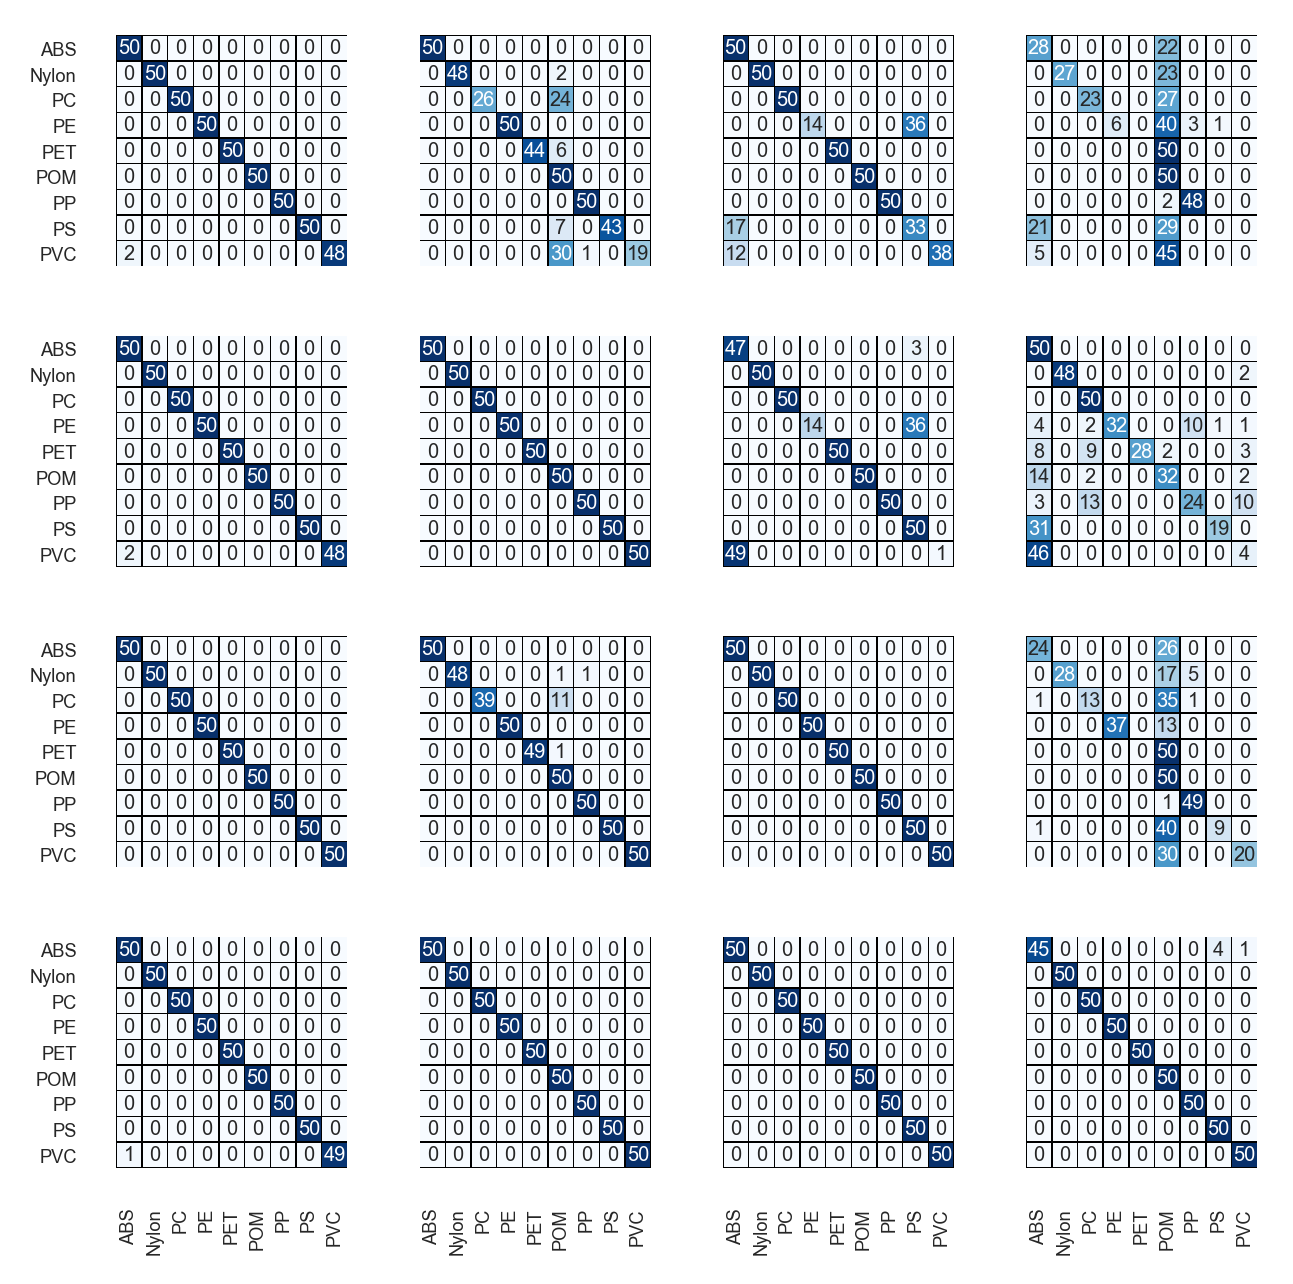

In [154]:
plt.figure(figsize=(5,5), dpi=300)

sns.set(font_scale=0.4)

plt.subplot(4,4,1)
sns.heatmap(cm_LD25_LD, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False)

plt.subplot(4,4,2)
sns.heatmap(cm_LD25_LW, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False ,yticklabels=False)

plt.subplot(4,4,3)
sns.heatmap(cm_LD25_SD, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False ,yticklabels=False)

plt.subplot(4,4,4)
sns.heatmap(cm_LD25_SW, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False ,yticklabels=False)

plt.subplot(4,4,5)
sns.heatmap(cm_LW25_LD, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False)

plt.subplot(4,4,6)
sns.heatmap(cm_LW25_LW, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False ,yticklabels=False)

plt.subplot(4,4,7)
sns.heatmap(cm_LW25_SD, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False ,yticklabels=False)

plt.subplot(4,4,8)
sns.heatmap(cm_LW25_SW, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False ,yticklabels=False)

plt.subplot(4,4,9)
sns.heatmap(cm_SD25_LD, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False)

plt.subplot(4,4,10)
sns.heatmap(cm_SD25_LW, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False ,yticklabels=False)

plt.subplot(4,4,11)
sns.heatmap(cm_SD25_SD, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False ,yticklabels=False)

plt.subplot(4,4,12)
sns.heatmap(cm_SD25_SW, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False, xticklabels=False ,yticklabels=False)

plt.subplot(4,4,13)
sns.heatmap(cm_SW25_LD, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False)

plt.subplot(4,4,14)
sns.heatmap(cm_SW25_LW, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False,yticklabels=False)

plt.subplot(4,4,15)
sns.heatmap(cm_SW25_SD, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False,yticklabels=False)

plt.subplot(4,4,16)
sns.heatmap(cm_SW25_SW, annot=True, cmap='Blues', vmin=0, vmax=50, square=True, linewidths=0.1, linecolor="Black", cbar=False,yticklabels=False)

plt.subplots_adjust(hspace=0.3)